In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Defined training dataset

In [135]:
['DISE_gr2','TYPE_OP2','SSI','Emergency','ASA_Class','SEX','RF','WARFARIN','Age','ebl','Pre_Hb','Pre_Hct','Pre_PLT','NL_ratio','Pre_rPTT','Pre_PT_INR']import pandas as pd

In [136]:
df1= pd.read_csv("/content/drive/MyDrive/Massive_transfusion/train_data_df_book_DCA.csv",sep=",")

In [137]:
df1.head()

,ID,HN,T_PRC,DISE_gr2,TYPE_OP2,SSI,Emergency,ASA_Class,Use_PRC,SEX,RF,WARFARIN,Age,Age_gr,ebl,Pre_WBC,Pre_Hb,Pre_Hct,Pre_PLT,NL_ratio,Pre_rPTT,Pre_PT_INR
0,1,1375800,0,1,1,0,0,3,0,1,0,0,54.0,2,600,19.58,13.5,38.8,403,9.444444,0.73,0.86
1,2,810826,0,4,12,1,1,3,0,2,1,0,66.0,3,200,8.63,12.5,38.1,439,3.777778,0.72,0.85
2,6,1871717,1,4,2,0,1,3,1,1,0,0,39.0,2,1000,11.60,13.3,40.4,318,2.428571,0.94,0.92
3,7,1871717,1,3,1,0,1,3,2,1,0,0,39.0,2,500,6.64,8.6,25.5,58,6.454545,1.29,1.43
4,8,1871717,1,3,1,0,1,3,1,1,0,0,39.0,2,500,10.19,9.8,27.5,119,4.058824,1.02,1.03


In [138]:
# Define X_train, y_train เองจาก ที่ละ csv files
y_train = df1['T_PRC']
X_train= df1[['DISE_gr2','TYPE_OP2','SSI','Emergency','ASA_Class','SEX','RF','WARFARIN','Age','ebl','Pre_Hb','Pre_Hct','Pre_PLT','NL_ratio','Pre_rPTT','Pre_PT_INR']]

Define X_test y_test จาก test.csv




In [139]:
df2= pd.read_csv("/content/drive/MyDrive/Massive_transfusion/test_data_df_book_DCA.csv",sep=",")

In [140]:
# Define X_test, y_test เองจาก ที่ละ csv files
y_test= df2['T_PRC']
X_test= df2[['DISE_gr2','TYPE_OP2','SSI','Emergency','ASA_Class','SEX','RF','WARFARIN','Age','ebl','Pre_Hb','Pre_Hct','Pre_PLT','NL_ratio','Pre_rPTT','Pre_PT_INR']]

In [141]:
class_names= df2['T_PRC']

In [142]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1879, 16) (804, 16) (1879,) (804,)


#Naïve Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
nb_clf= GaussianNB()
# fit model
nb_clf.fit(X_train,y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

cross val score from training data

In [ ]:
#crossval score ตอน training data Y train ว่า accuracy score เท่าไร แต่มันจะ overfit นะ 
from sklearn.model_selection import cross_val_score
cross_val_score(nb_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.79787234, 0.79787234, 0.81117021, 0.77925532, 0.76533333])

In [ ]:
# make predictions
prediction_nb= nb_clf.predict(X_test)
probs_nb=nb_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_nb1 = probs_nb[:, 1]

In [ ]:
print(probs_nb1)

[1.12708621e-01 9.99995516e-01 1.65585218e-09 3.96558524e-11
 7.89902382e-01 9.99853897e-01 7.07224733e-01 7.06733726e-01
 4.99727835e-03 9.04399301e-02 1.13429913e-01 5.58895563e-01
 2.69827512e-04 1.00000000e+00 1.07334181e-10 3.35563365e-03
 1.10026758e-02 2.75937448e-02 7.21321057e-01 6.98460165e-02
 9.99998983e-01 7.81074515e-03 1.66442303e-02 9.51047569e-01
 1.20452300e-01 6.58867274e-01 4.39159789e-01 2.09755212e-04
 1.74723847e-09 3.33537532e-03 2.10213733e-04 9.99956173e-01
 5.64603522e-01 9.49033226e-11 7.99787989e-01 9.87334093e-05
 1.45123179e-01 1.00000000e+00 1.82047875e-04 9.99994752e-01
 1.00000000e+00 9.47819533e-04 5.09242525e-01 1.00000000e+00
 4.28092251e-03 9.99999988e-01 7.17691941e-05 5.18752680e-04
 1.52073374e-11 7.47726419e-01 8.33582154e-04 3.02212992e-01
 1.00000000e+00 3.26368007e-09 8.78420887e-01 6.89717159e-02
 4.89866131e-01 7.49071941e-04 1.85457591e-01 1.67821176e-01
 9.67736410e-01 8.99503008e-01 1.00000000e+00 3.03160928e-03
 3.70020818e-02 8.422178

In [ ]:
print(prediction_nb)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 

Text(0, 0.5, 'Predictions')

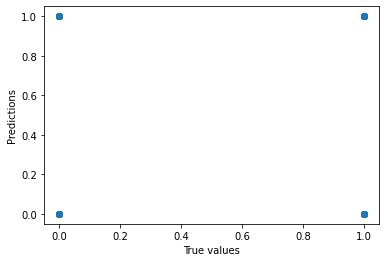

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction_nb)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [ ]:
print(probs_nb)

[[8.87291379e-01 1.12708621e-01]
 [4.48373779e-06 9.99995516e-01]
 [9.99999998e-01 1.65585218e-09]
 ...
 [7.16819499e-01 2.83180501e-01]
 [9.39798928e-01 6.02010720e-02]
 [5.74442631e-01 4.25557369e-01]]


Save prediction of NB

In [ ]:
# Create and populate a 5x2 NumPy array.
my_data = prediction_nb
my_data

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Create a Python list that holds the names of the two columns.
my_column_names = [ 'prediction_nb']

In [ ]:
# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)
my_dataframe

,prediction_nb
0,0
1,1
2,0
3,0
4,1
...,...
799,0
800,0
801,0
802,0


In [ ]:
from google.colab import files
my_dataframe.to_csv('nb.csv') 
files.download('nb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [255]:
# Create df
my_data= y_test
# Create a Python list that holds the names of the two columns.
my_column_names = [ 'y_test']
# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)
my_dataframe
#download csv file 
from google.colab import files
my_dataframe.to_csv('y_test.csv') 
files.download('y_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [256]:
print(y_test)

0      0
1      1
2      0
3      0
4      0
      ..
799    0
800    0
801    0
802    0
803    1
Name: T_PRC, Length: 804, dtype: int64


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# confusion matrix
matrix = confusion_matrix(y_test,prediction_nb, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_nb,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_nb,labels=[1,0])
print('Classification report : \n',matrix)
### ดู score ของ class 1
### Accuracy score from testing set 
acc=accuracy_score(y_test,nb_clf.predict(X_test))
print("the accuracy score is %s"%acc)  


Confusion matrix : 
 [[203 130]
 [ 53 418]]
Outcome values : 
 203 130 53 418
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.61      0.69       333
           0       0.76      0.89      0.82       471

    accuracy                           0.77       804
   macro avg       0.78      0.75      0.75       804
weighted avg       0.78      0.77      0.77       804

the accuracy score is 0.7723880597014925


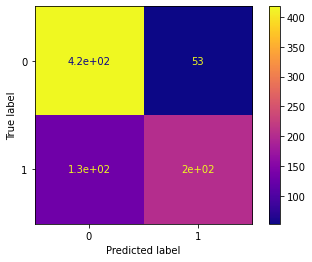

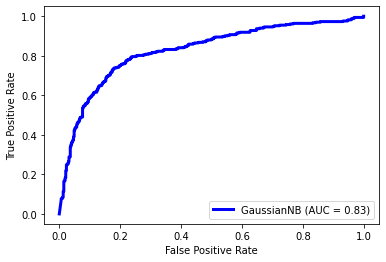

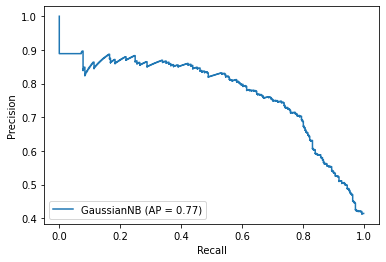

In [ ]:
#confusion matrix2
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import  plot_precision_recall_curve
plot_confusion_matrix(nb_clf, X_test, y_test, display_labels=class_names,cmap=plt.cm.plasma)   # 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plot_roc_curve(nb_clf, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(nb_clf, X_test, y_test)

#### SVM ####

In [ ]:
from sklearn.svm import SVC
# Initial svm model
svc_clf=SVC()
svc_clf.fit(X_train, y_train) 
# ไม่ปรับparameter ใดๆ

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

cross score from training dataset 

In [ ]:
#crossval score ตอน training data Y train ว่า accuracy score เท่าไร แต่มันจะ overfit นะ 
from sklearn.model_selection import cross_val_score
#svc_clf = svm.SVC(kernel='rbf', C=1, random_state=42)
cross_scores = cross_val_score(svc_clf, X_train, y_train, cv=5)
cross_scores 

array([0.80319149, 0.79255319, 0.83776596, 0.77393617, 0.77333333])

Tuning parameter by GridsearchCV of SVM *** wไม่ tune เพราะ เครื่อง hang เลย

---



#svm prediction

In [ ]:
# make predictions
prediction_svm= svc_clf .predict(X_test)
probs_svm = svc_clf.decision_function (X_test) 
#probs_svm = svmGclf.predict_proba(X_test, probability=True) # ใช้ fuction predict_proba ไม่ได้ 
# 5-fold cross-validation, and predict_proba may be inconsistent with predict. 
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# keep probabilities for the positive outcome only
probs_svm1 = probs_svm 

In [ ]:
print(prediction_svm)

[0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0
 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0
 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 

In [ ]:
print(probs_svm )

[-1.16336305  1.04753301 -1.03102231 -0.55737188 -1.14010232  1.35645143
  1.04237169  1.27298588  1.27216602 -0.35226565 -0.86580869 -0.95217779
 -1.1226697   1.27744285 -0.47701743 -1.02728977 -1.08339228 -1.12345856
  1.35720587 -0.57724739  1.01732708  0.40717572 -1.16045193  1.14140839
 -0.63190411  1.0454008   0.07901498 -1.1333332   0.76365519 -1.11387828
 -1.12247527  1.29175619  1.42311958 -0.82403166 -1.13571495 -1.11687714
  0.30767933 -1.13281104 -1.09722247  1.32925113 -1.14045607 -1.15460496
  1.11121033  1.27204992 -1.07696223  1.03827583 -1.1322903  -0.96599998
  0.36591008  1.18157633 -1.10644649 -0.59050379  1.55349574 -1.11093345
  1.27829247 -0.3287449   0.36381285 -0.99102376  0.44907018 -0.68329019
  1.24505548  1.32130688  1.75526677 -1.13785369 -1.04697128  1.00342875
 -0.33159094  1.00368999 -1.12748512 -1.11458307 -1.12486208 -1.11571859
 -1.11108454 -1.10845438  0.7072352   1.09687869 -0.99530179  1.09178535
 -0.66753524 -0.63913312 -1.18500366  1.46588063 -0

In [ ]:
print(probs_svm1)

[-1.16336305  1.04753301 -1.03102231 -0.55737188 -1.14010232  1.35645143
  1.04237169  1.27298588  1.27216602 -0.35226565 -0.86580869 -0.95217779
 -1.1226697   1.27744285 -0.47701743 -1.02728977 -1.08339228 -1.12345856
  1.35720587 -0.57724739  1.01732708  0.40717572 -1.16045193  1.14140839
 -0.63190411  1.0454008   0.07901498 -1.1333332   0.76365519 -1.11387828
 -1.12247527  1.29175619  1.42311958 -0.82403166 -1.13571495 -1.11687714
  0.30767933 -1.13281104 -1.09722247  1.32925113 -1.14045607 -1.15460496
  1.11121033  1.27204992 -1.07696223  1.03827583 -1.1322903  -0.96599998
  0.36591008  1.18157633 -1.10644649 -0.59050379  1.55349574 -1.11093345
  1.27829247 -0.3287449   0.36381285 -0.99102376  0.44907018 -0.68329019
  1.24505548  1.32130688  1.75526677 -1.13785369 -1.04697128  1.00342875
 -0.33159094  1.00368999 -1.12748512 -1.11458307 -1.12486208 -1.11571859
 -1.11108454 -1.10845438  0.7072352   1.09687869 -0.99530179  1.09178535
 -0.66753524 -0.63913312 -1.18500366  1.46588063 -0

SAVE prediction of SVM


In [ ]:
# Create df
my_data= prediction_svm
# Create a Python list that holds the names of the two columns.
my_column_names = [ 'prediction_svm']
# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)
my_dataframe
#download csv file 
#from google.colab import files
#my_dataframe.to_csv('svm.csv') 
#files.download('svm.csv')

,prediction_svm
0,0
1,1
2,0
3,0
4,0
...,...
799,0
800,0
801,0
802,0


In [ ]:
#download csv file 
from google.colab import files
my_dataframe.to_csv('svm.csv') 
files.download('svm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion matrix SVM

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# confusion matrix
matrix = confusion_matrix(y_test,prediction_svm, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_svm,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_svm,labels=[1,0])
print('Classification report : \n',matrix)
### ดู score ของ class 1
### Accuracy score from testing set 


acc=accuracy_score(y_test,svc_clf.predict(X_test))
print("the accuracy score is %s"%acc)  

Confusion matrix : 
 [[219 114]
 [ 63 408]]
Outcome values : 
 219 114 63 408
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.66      0.71       333
           0       0.78      0.87      0.82       471

    accuracy                           0.78       804
   macro avg       0.78      0.76      0.77       804
weighted avg       0.78      0.78      0.78       804

the accuracy score is 0.7798507462686567


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,svc_clf.predict(X_test))

0.7798507462686567

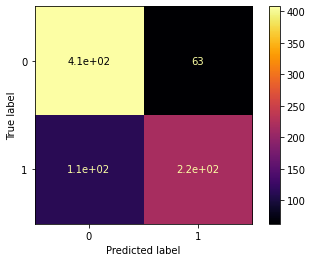

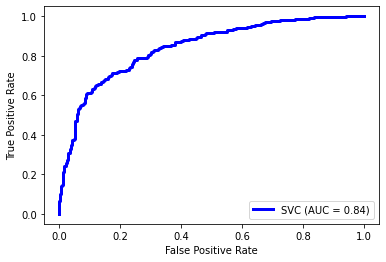

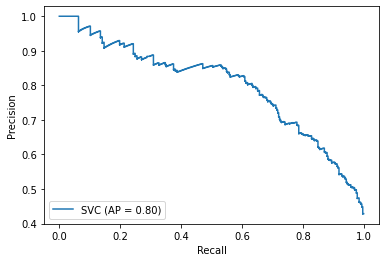

In [ ]:
#confusion matrix2
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt
plot_confusion_matrix(svc_clf, X_test, y_test, display_labels=class_names,cmap=plt.cm.inferno)   # 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plot_roc_curve(svc_clf, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(svc_clf, X_test, y_test)

# K-NN

In [ ]:
from sklearn  import  neighbors
# Fitmodel แบบ initial rule of thumb=5
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#crossval score ตอน training data Y train ว่า accuracy score เท่าไร แต่มันจะ overfit นะ 
from sklearn.model_selection import cross_val_score
#svc_clf = svm.SVC(kernel='rbf', C=1, random_state=42)
cross_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)
cross_scores 

array([0.81648936, 0.78989362, 0.79521277, 0.78457447, 0.768     ])

#Turing Grid Knn

In [ ]:
n_neighbors =  (1,5)
algorithm= ['auto', 'ball_tree','kd_tree','brute']
#weights= ['uniform', 'distance']

#param_grid=dict(n_neighbors=n_neighbors,algorithm=algorithm,weights=weights ) 
param_grid=dict(n_neighbors=n_neighbors,algorithm=algorithm ) 

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
knnGclf = GridSearchCV(estimator=knn_clf , param_grid=param_grid,cv=5)    #this is where we setup the grid search. # CV=5

In [ ]:
# ดู best setting 
knnGclf.fit(X_train, y_train)        #this is the main code, where we fit the model to the training data for different grid points!

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': (1, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#รวมcode Grid
n_neighbors =  (1,5)
param_grid=dict(n_neighbors=n_neighbors ) 

knnGclf = GridSearchCV(estimator=knn_clf , param_grid=param_grid,cv=5)   
knnGclf.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={'n_neighbors': (1, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("the best estimator is %s"%knnGclf.best_estimator_)  
print("the best params is %s"%knnGclf.best_params_)  
print("the best score is %s"%knnGclf.best_score_)  

the best estimator is KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
the best params is {'n_neighbors': 5}
the best score is 0.7908340425531915


In [ ]:
#PostGrid model 
knnGmodel =knnGclf.best_estimator_

#K-nn prediction

In [ ]:
# make predictions
prediction_knn= knnGmodel.predict(X_test)
probs_knn=knnGmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_knn1 = probs_knn[:, 1]

In [ ]:
print(prediction_knn)

[0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1
 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0
 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
print(probs_knn)

[[0.8 0.2]
 [0.  1. ]
 [0.8 0.2]
 ...
 [0.8 0.2]
 [1.  0. ]
 [0.2 0.8]]


In [ ]:
print(probs_knn1)

[0.2 1.  0.2 0.8 0.  1.  1.  0.6 0.6 0.2 0.2 0.2 0.  1.  0.  0.  0.2 0.
 0.8 0.8 1.  0.6 0.  1.  0.4 0.6 0.  0.2 0.8 0.  0.  1.  0.6 0.  0.  0.
 0.8 0.2 0.  1.  0.2 0.  0.4 1.  0.  1.  0.2 0.4 0.8 0.6 0.2 0.6 1.  0.2
 1.  0.6 1.  0.2 1.  1.  1.  1.  1.  0.  0.2 0.4 0.2 0.4 0.  0.2 0.  0.
 0.2 0.  0.6 0.4 0.  0.6 0.  0.2 0.4 1.  0.  0.  1.  1.  1.  0.4 0.2 0.
 0.  0.  0.6 0.6 0.4 0.4 0.  0.  0.6 1.  0.6 1.  0.4 0.2 0.2 0.8 0.  0.4
 1.  0.2 0.8 0.8 0.8 0.  0.8 0.8 0.6 1.  1.  0.2 0.2 0.2 0.  0.8 0.2 0.
 0.4 0.4 0.6 0.4 0.8 0.2 0.6 0.2 0.6 1.  0.  0.  1.  0.  0.2 0.6 0.6 0.2
 0.  1.  0.6 0.  1.  0.8 0.8 0.  0.4 0.  0.  0.4 0.6 1.  1.  0.2 1.  0.2
 1.  0.8 0.4 0.6 0.2 1.  1.  0.  0.  0.  0.  0.8 0.2 0.  0.2 0.  0.  0.8
 0.4 1.  0.6 0.  0.  0.4 0.  0.6 0.  0.4 0.6 0.  0.  0.  0.6 0.6 0.8 1.
 0.  0.6 0.4 0.8 0.2 0.  1.  0.6 0.8 0.  0.6 0.2 0.  0.  0.  0.  0.6 0.
 0.2 0.2 0.  0.6 0.8 0.  0.4 0.  1.  0.8 1.  0.4 0.  0.8 0.8 0.  0.  0.
 0.2 1.  0.  0.  0.4 0.  0.2 0.  1.  0.  0.6 1.  0.  0.2 0.

Confusion matrix Knn

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# confusion matrix
matrix = confusion_matrix(y_test,prediction_knn, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_knn,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_knn,labels=[1,0])
print('Classification report : \n',matrix)
### ดู score ของ class 1
# Accuracy score from testing set 
acc=accuracy_score(y_test,knn_clf.predict(X_test))
print("the accuracy score is %s"%acc)  


Confusion matrix : 
 [[223 110]
 [ 75 396]]
Outcome values : 
 223 110 75 396
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.67      0.71       333
           0       0.78      0.84      0.81       471

    accuracy                           0.77       804
   macro avg       0.77      0.76      0.76       804
weighted avg       0.77      0.77      0.77       804

the accuracy score is 0.7699004975124378


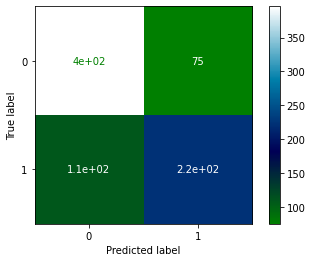

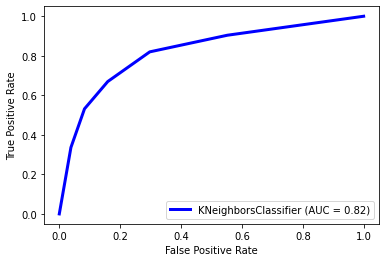

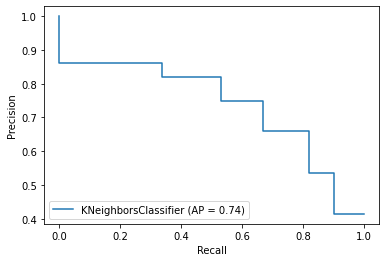

In [ ]:
#confusion matrix2
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import  plot_precision_recall_curve

plot_confusion_matrix(knn_clf, X_test, y_test, display_labels=class_names,cmap=plt.cm.ocean)   # 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plot_roc_curve(knn_clf, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(knn_clf, X_test, y_test)

SAVE KNN prediction

In [ ]:
# Create df
my_data= prediction_knn
# Create a Python list that holds the names of the two columns.
my_column_names = [ 'prediction_knn']
# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)
my_dataframe
#download csv file 
from google.colab import files
my_dataframe.to_csv('knn.csv') 
files.download('knn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ANN

In [ ]:
#fit model -initial 
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

ann_clf = MLPClassifier()
ann_clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#crossval score ตอน training data Y train ว่า accuracy score เท่าไร แต่มันจะ overfit นะ 
from sklearn.model_selection import cross_val_score
cross_scores = cross_val_score(ann_clf, X_train, y_train, cv=5)
cross_scores 

array([0.84574468, 0.84042553, 0.87765957, 0.81648936, 0.84533333])

In [ ]:
ann_clf.fit(X_train, y_train)      

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# make predictions
prediction_ann= ann_clf.predict(X_test)
probs_ann=ann_clf.predict_proba(X_test)
# keep probabilities for the positive 

In [ ]:
print(prediction_ann)
print(probs_ann)

[0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# confusion matrix
matrix = confusion_matrix(y_test,prediction_ann, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_ann,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_ann,labels=[1,0])
print('Classification report : \n',matrix)
### ดู score ของ class 1

# Accuracy score from testing set 
acc=accuracy_score(y_test,ann_clf.predict(X_test))
print("the accuracy score is %s"%acc)  

Confusion matrix : 
 [[206 127]
 [ 36 435]]
Outcome values : 
 206 127 36 435
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.62      0.72       333
           0       0.77      0.92      0.84       471

    accuracy                           0.80       804
   macro avg       0.81      0.77      0.78       804
weighted avg       0.81      0.80      0.79       804

the accuracy score is 0.7972636815920398


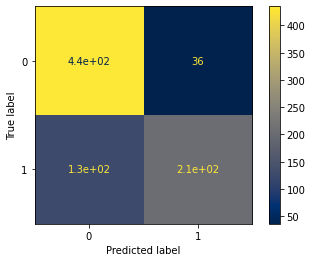

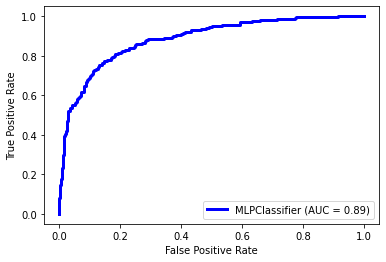

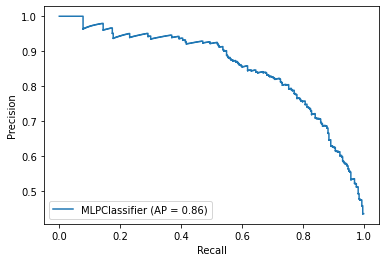

In [ ]:
#confusion matrix2
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
plot_confusion_matrix(ann_clf, X_test, y_test, display_labels=class_names,cmap=plt.cm.cividis)   # 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plot_roc_curve(ann_clf, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(ann_clf, X_test, y_test)

In [ ]:
# Create df
my_data= prediction_ann
# Create a Python list that holds the names of the two columns.
my_column_names = [ 'prediction_ann']
# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)
my_dataframe
#download csv file 
from google.colab import files
my_dataframe.to_csv('annNoGrid.csv') 
files.download('annNoGrid.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Tuning parameter by GridsearchCV of ANN

In [ ]:
from sklearn.model_selection import GridSearchCV
activation= ['relu', 'identity','logistic','tanh'] 
#solver= ['lbfgs', 'sgd','adam']
#learning_rate= ['constant', 'invscaling','adaptive']
#hidden_layer_sizes =  (2,100)
#alpha = (0.0001,10)

#param_grid=dict(activation=activation, solver=solver,learning_rate=learning_rate, hidden_layer_sizes=hidden_layer_sizes ,alpha=alpha ) 
#param_grid=dict(activation=activation, solver=solver ) 
param_grid=dict(activation=activation ) 
annGclf = GridSearchCV(estimator=ann_clf , param_grid=param_grid, cv=5)    #this is where we setup the grid search.  ## cv=5
annGclf.fit(X_train, y_train)   

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [ ]:
annGclf = GridSearchCV(estimator=ann_clf , param_grid=param_grid, cv=5)    #this is where we setup the grid search.  ## cv=5
annGclf.fit(X_train, y_train)   

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [ ]:
annGclf.fit(X_train, y_train)        #this is the main code, where we fit the model to the training data for different grid points!

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [ ]:
print("the best estimator is %s"%annGclf.best_estimator_)  
print("the best params is %s"%annGclf.best_params_)  
print("the best score is %s"%annGclf.best_score_)  

the best estimator is MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
the best params is {'activation': 'logistic'}
the best score is 0.8461943262411348


#Make prediction  

In [ ]:
#Postgrid model 
annGmodel = annGclf.best_estimator_


In [ ]:
# make predictions
prediction_ann= annGmodel.predict(X_test)
probs_ann=annGmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_ann1 = probs_ann[:, 1]

In [ ]:
print(prediction_ann)

[0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1
 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1
 1 0 0 0 1 1 0 0 0 0 0 0 

In [ ]:
print(probs_ann)

[[0.92203822 0.07796178]
 [0.08673311 0.91326689]
 [0.74964237 0.25035763]
 ...
 [0.76117629 0.23882371]
 [0.98567848 0.01432152]
 [0.19595817 0.80404183]]


In [ ]:
print(probs_ann1)

[0.07796178 0.91326689 0.25035763 0.28737686 0.09846882 0.97386744
 0.79709366 0.64807796 0.48717785 0.09690023 0.23569439 0.48515404
 0.01163147 0.99330016 0.15201583 0.0088043  0.09315445 0.02888439
 0.88299662 0.25695572 0.97273944 0.17310086 0.02190925 0.65803584
 0.063668   0.70180973 0.80440571 0.07101177 0.59524493 0.07184606
 0.05325641 0.98908755 0.83854324 0.06974507 0.0665102  0.00888697
 0.40309859 0.41854877 0.01223151 0.98477936 0.13527754 0.01119911
 0.8931707  0.99479604 0.13430332 0.97394916 0.01257557 0.10214324
 0.19993539 0.36311717 0.20515199 0.44165257 0.97072202 0.11969829
 0.93499479 0.13026937 0.85797611 0.02184362 0.365707   0.31503023
 0.8081029  0.96866817 0.97670592 0.01261632 0.25187745 0.72980855
 0.09441326 0.85386584 0.3627856  0.09256152 0.01201319 0.07009967
 0.09939099 0.21441284 0.55092168 0.79195746 0.04921122 0.90645353
 0.0371845  0.08808753 0.03420011 0.92440959 0.32651689 0.1221042
 0.98407256 0.97637196 0.98173587 0.03420011 0.26921622 0.01304

Confusion matrix

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# confusion matrix
matrix = confusion_matrix(y_test,prediction_ann, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_ann,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_ann,labels=[1,0])
print('Classification report : \n',matrix)
### ดู score ของ class 1

# Accuracy score from testing set 
acc=accuracy_score(y_test,ann_clf.predict(X_test))
print("the accuracy score is %s"%acc)  


Confusion matrix : 
 [[242  91]
 [ 45 426]]
Outcome values : 
 242 91 45 426
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.73      0.78       333
           0       0.82      0.90      0.86       471

    accuracy                           0.83       804
   macro avg       0.83      0.82      0.82       804
weighted avg       0.83      0.83      0.83       804

the accuracy score is 0.7972636815920398


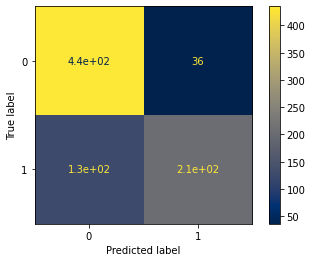

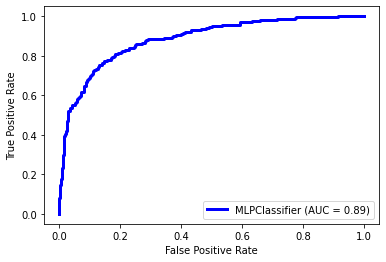

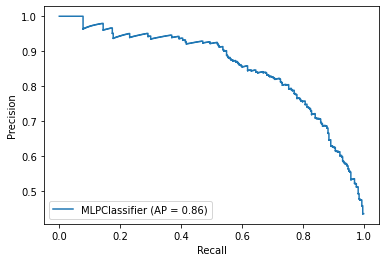

In [ ]:
#confusion matrix2
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
plot_confusion_matrix(ann_clf, X_test, y_test, display_labels=class_names,cmap=plt.cm.cividis)   # 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plot_roc_curve(ann_clf, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(ann_clf, X_test, y_test)

SAVE prediction of ANN

In [ ]:
# Create df
my_data= prediction_ann
# Create a Python list that holds the names of the two columns.
my_column_names = [ 'prediction_ann']
# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)
my_dataframe
#download csv file 
from google.colab import files
my_dataframe.to_csv('annG.csv') 
files.download('annG.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Decision tree

#1. Initial model (without pruning)

In [ ]:
## fit initial model 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)

In [ ]:
# accuracy score with initial DT
from sklearn.metrics import accuracy_score
y_train_predicted=dt_clf.predict(X_train)
y_test_predicted=dt_clf.predict(X_test)
accuracy_score(y_train,y_train_predicted)
accuracy_score(y_test,y_test_predicted)

0.7723880597014925

In [ ]:
#crossval score ตอน training data Y train ว่า accuracy score เท่าไร แต่มันจะ overfit นะ 
from sklearn.model_selection import cross_val_score
cross_scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
cross_scores 

array([0.77659574, 0.77393617, 0.80053191, 0.75265957, 0.76      ])

In [ ]:
# make predictions with initial DT
prediction_dt= dt_clf.predict(X_test)
probs_dt=dt_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_dt1 = probs_dt[:, 1]

In [ ]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# confusion matrix
matrix = confusion_matrix(y_test,prediction_dt, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_dt,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_dt,labels=[1,0])
print('Classification report : \n',matrix)
### ดู score ของ class 1

Confusion matrix : 
 [[243  90]
 [ 93 378]]
Outcome values : 
 243 90 93 378
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.73      0.73       333
           0       0.81      0.80      0.81       471

    accuracy                           0.77       804
   macro avg       0.77      0.77      0.77       804
weighted avg       0.77      0.77      0.77       804



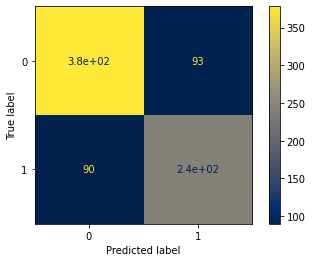

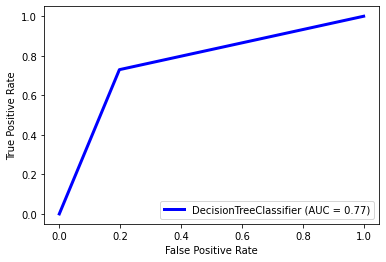

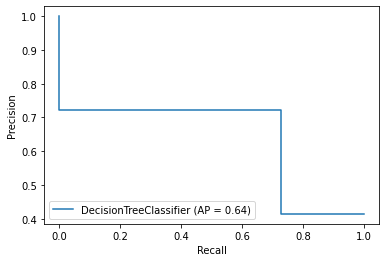

In [ ]:
#confusion matrix2
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=class_names,cmap=plt.cm.cividis)   # 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plot_roc_curve(dt_clf, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(dt_clf, X_test, y_test)

# plot decision tree


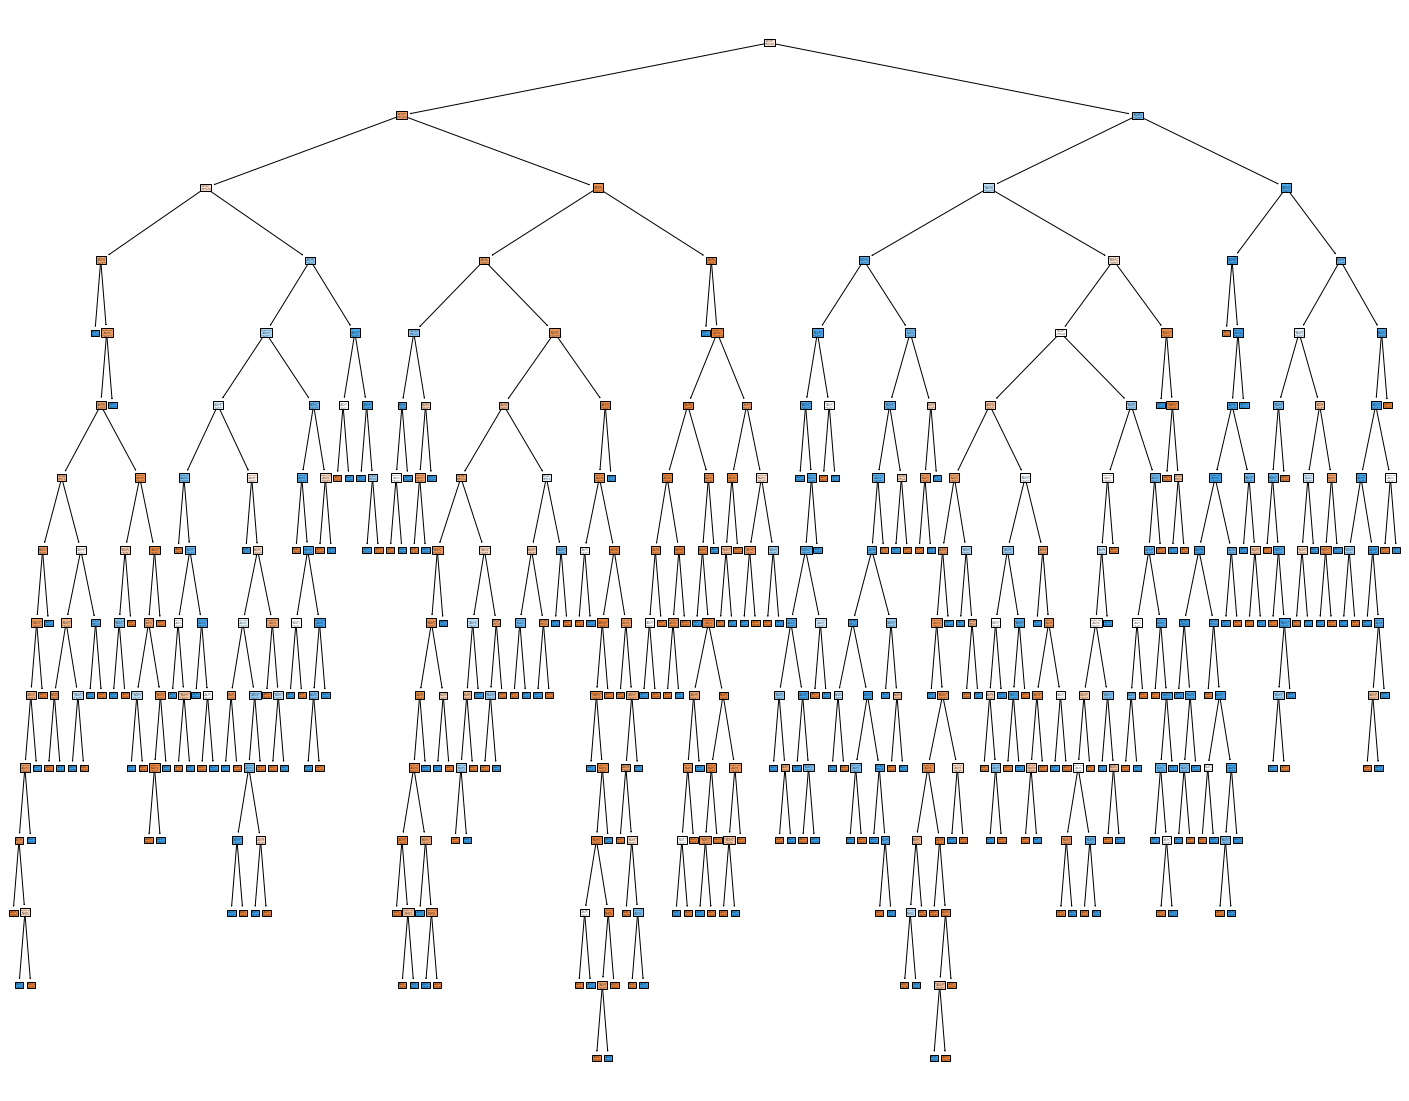

In [ ]:
import matplotlib.pyplot as plt 
fn=['DISE_gr2','TYPE_OP2','SSI','Emergency','ASA_Class','SEX','RF','WARFARIN','Age','ebl','Pre_Hb','Pre_Hct','Pre_PLT','NL_ratio','Pre_rPTT','Pre_PT_INR']
cn=['0', '1']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_clf, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)


#Pruning decision tree


#1.Pre-pruning by GridSearch

*   รายการในลิสต์
*   รายการในลิสต์


#2.Post-pruning by cost-complex

# 0. Initial decision tree (unpruned tree)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## fit initial model 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)

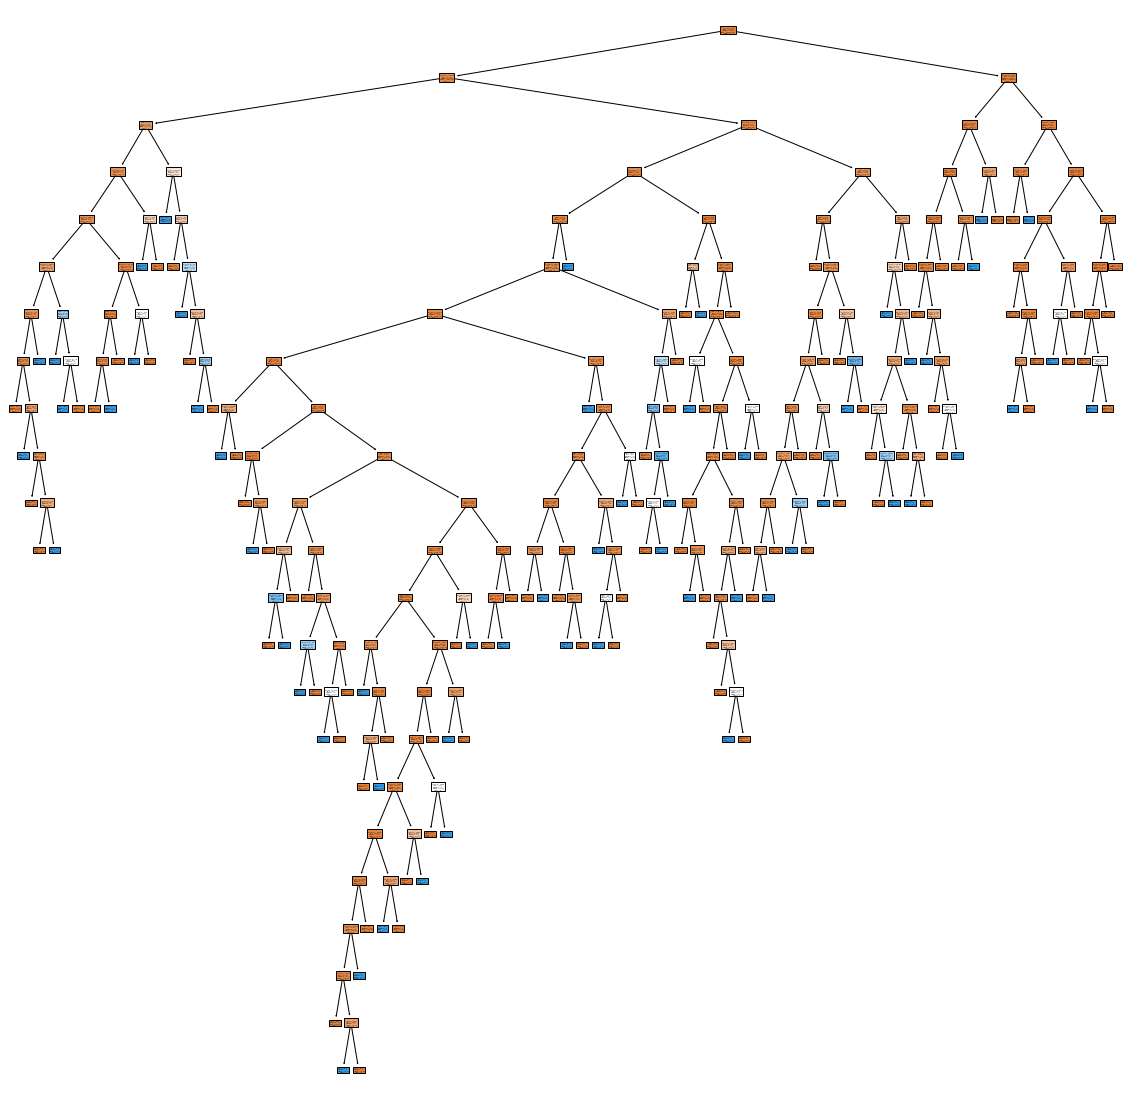

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,20))
fn=['DISE_gr2','TYPE_OP2','ASA_Class','WARFARIN','Age','Pre_Hb','Pre_Hct','Pre_PLT','Pre_rPTT','Pre_PT_INR']
cn=['0', '1']
tree.plot_tree(dt_clf ,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [ ]:
y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

In [ ]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.7723880597014925
Train Confusion matrix


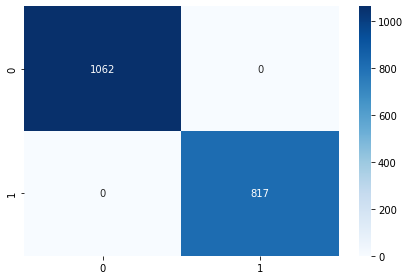

Test Confusion matrix


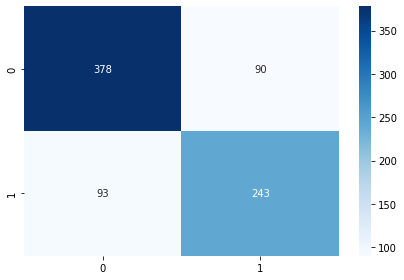

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
fn=['DISE_gr2','TYPE_OP2','SSI','Emergency','ASA_Class','SEX','RF','WARFARIN','Age','ebl','Pre_Hb','Pre_Hct','Pre_PLT','NL_ratio','Pre_rPTT','Pre_PT_INR']
classes=['0', '1']

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

#prediction by unpruned decision tree

In [143]:
# make predictions with initial DT
prediction_dt1= dt_clf.predict(X_test)
probs_dt1=dt_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_dt1 = probs_dt1[:, 1]

In [144]:
#confusion matrix of intital DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# confusion matrix
matrix = confusion_matrix(y_test,prediction_dt1, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_dt1,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_dt1,labels=[1,0])
print('Classification report : \n',matrix)
### ดู score ของ class 1
# Accuracy score from testing set 
acc=accuracy_score(y_test,dt_clf.predict(X_test))
print("the accuracy score is %s"%acc)  


Confusion matrix : 
 [[243  90]
 [ 93 378]]
Outcome values : 
 243 90 93 378
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.73      0.73       333
           0       0.81      0.80      0.81       471

    accuracy                           0.77       804
   macro avg       0.77      0.77      0.77       804
weighted avg       0.77      0.77      0.77       804

the accuracy score is 0.7723880597014925


In [145]:
 accuracy_score(y_test,dt_clf.predict(X_test))

0.7723880597014925

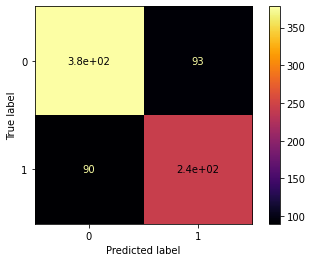

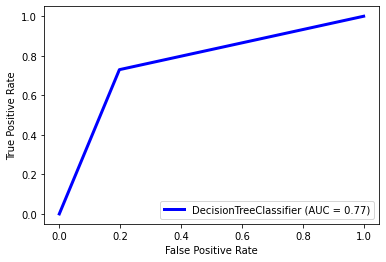

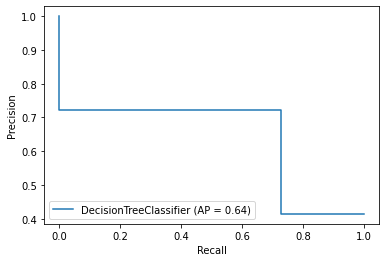

In [146]:
# plot confusion matrix, ROC and Precision-Recall of unpruned model
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt
plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=class_names,cmap=plt.cm.inferno)   
plot_roc_curve(dt_clf, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(dt_clf, X_test, y_test)

#1. Pre-pruning technique


    This technique is used before construction of decision tree.
    Pre-Pruning can be done using Hyperparameter tuning.
    Overcome the overfitting issue.
    ##In this blog i will use GridSearchCV for Hyperparameter tuning.

##In this blog i will use GridSearchCV for Hyperparameter tuning.

In [147]:
### GridSearch CV
from sklearn.model_selection import GridSearchCV
criterion = ['gini', 'entropy']
max_depth =  range(1,10)
#min_samples_split= range(1,10)
#min_sample_left= range(1,5)           

#param_grid= dict(criterion = criterion ,max_depth=max_depth, min_samples_split=min_samples_split, min_sample_left=min_sample_left )  
#param_grid= dict(criterion = criterion ,max_depth=max_depth, min_sample_left=min_sample_left  )  
#param_grid=dict(criterion = criterion , max_depth=max_depth ) 

param_grid= dict(criterion = criterion ,max_depth=max_depth )  

dtGclf = GridSearchCV(estimator=dt_clf , param_grid=param_grid,cv=5)    #this is where we setup the grid search.  # CV=5


dtGclf.fit(X_train, y_train)        #this is the main code, where we fit the model to the training data for different grid points!


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [148]:
print("the best estimator is %s"%dtGclf.best_estimator_)  
print("the best score is %s"%dtGclf.best_score_)  
print("the best params is %s"%dtGclf.best_params_)  

the best estimator is DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
the best score is 0.837663829787234
the best params is {'criterion': 'gini', 'max_depth': 3}


In [149]:
#นำค่า setting best from Grid มาใช้ใน model  
# ถ้าเอา dtGclf มา plot tree เลยไม่ได้ 
dtGmodel = dtGclf.best_estimator_
dtGmodel.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#plot tree from Gridemodel ตอนนี้จะเรียก dtGmodel

In [150]:
#plot tree from Gridemodel ตอนนี้จะเรียก dtBmodel
# graphviz
#https://mljar.com/blog/visualize-decision-tree/
from sklearn import tree
import graphviz
fn=['DISE_gr2','TYPE_OP2','SSI','Emergency','ASA_Class','SEX','RF','WARFARIN','Age','ebl','Pre_Hb','Pre_Hct','Pre_PLT','NL_ratio','Pre_rPTT','Pre_PT_INR']
cn=['0', '1']
text_representation = tree.export_text(dtGmodel)
print(text_representation)


|--- feature_9 <= 410.00
|   |--- feature_11 <= 33.75
|   |   |--- feature_9 <= 55.00
|   |   |   |--- class: 0
|   |   |--- feature_9 >  55.00
|   |   |   |--- class: 1
|   |--- feature_11 >  33.75
|   |   |--- feature_1 <= 3.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  3.50
|   |   |   |--- class: 0
|--- feature_9 >  410.00
|   |--- feature_9 <= 925.00
|   |   |--- feature_11 <= 37.75
|   |   |   |--- class: 1
|   |   |--- feature_11 >  37.75
|   |   |   |--- class: 0
|   |--- feature_9 >  925.00
|   |   |--- feature_11 <= 41.65
|   |   |   |--- class: 1
|   |   |--- feature_11 >  41.65
|   |   |   |--- class: 1



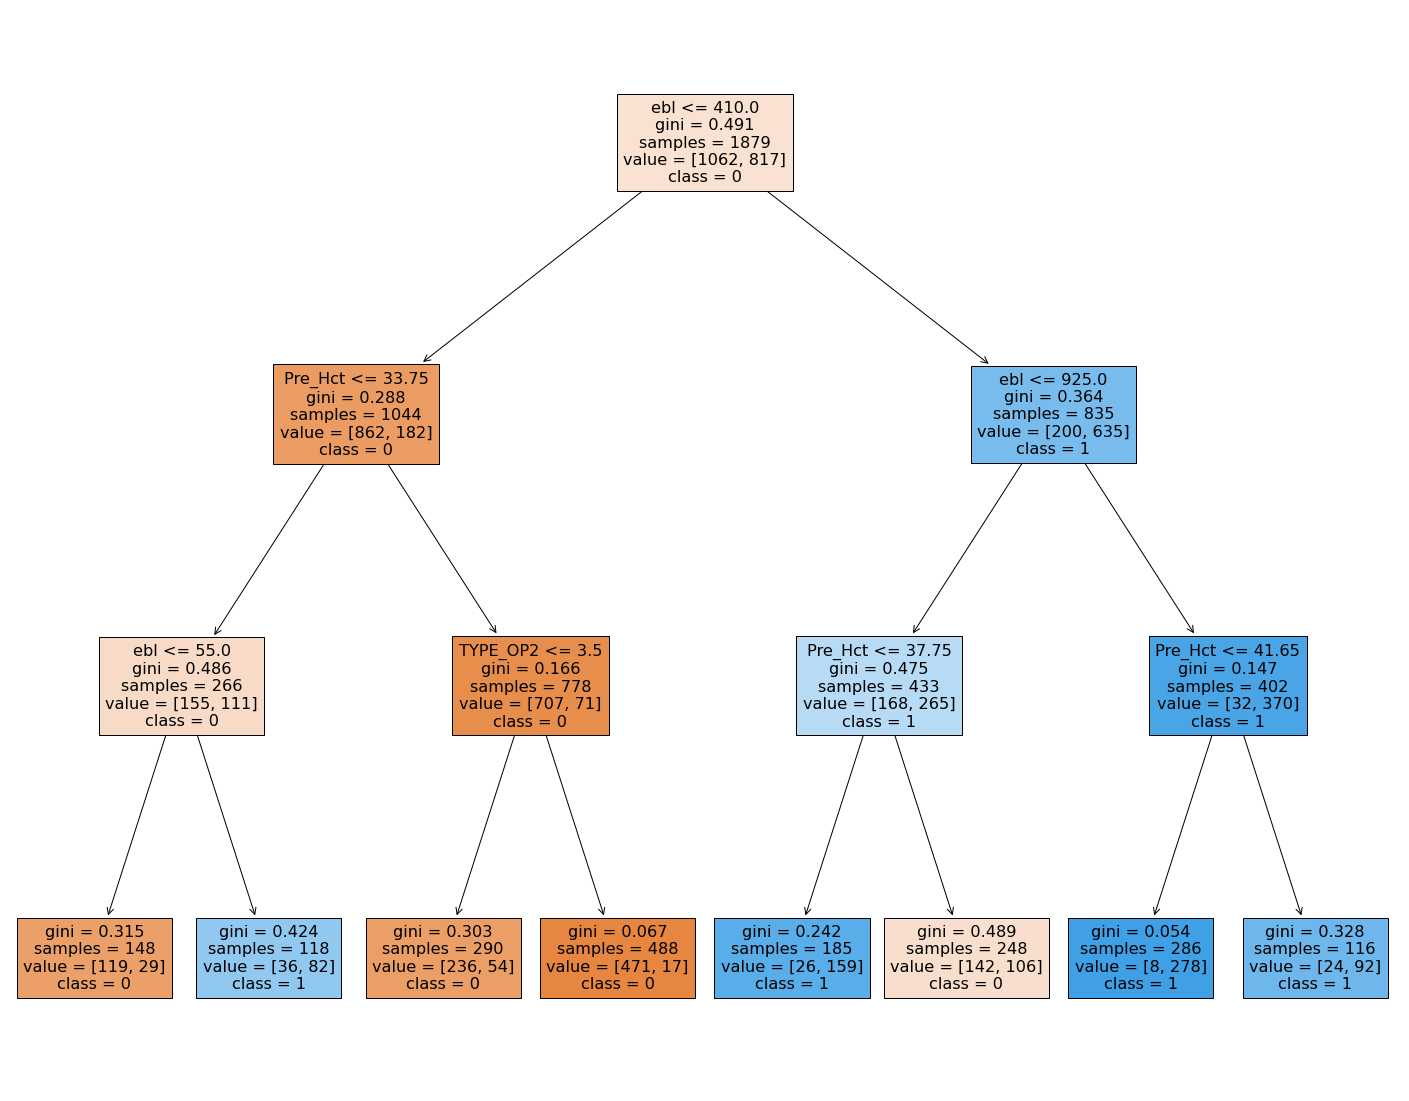

In [152]:
### Text tree to plot 
import matplotlib.pyplot as plt
fn=['DISE_gr2','TYPE_OP2','SSI','Emergency','ASA_Class','SEX','RF','WARFARIN','Age','ebl','Pre_Hb','Pre_Hct','Pre_PLT','NL_ratio','Pre_rPTT','Pre_PT_INR']
cn=['0', '1']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtGmodel, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)


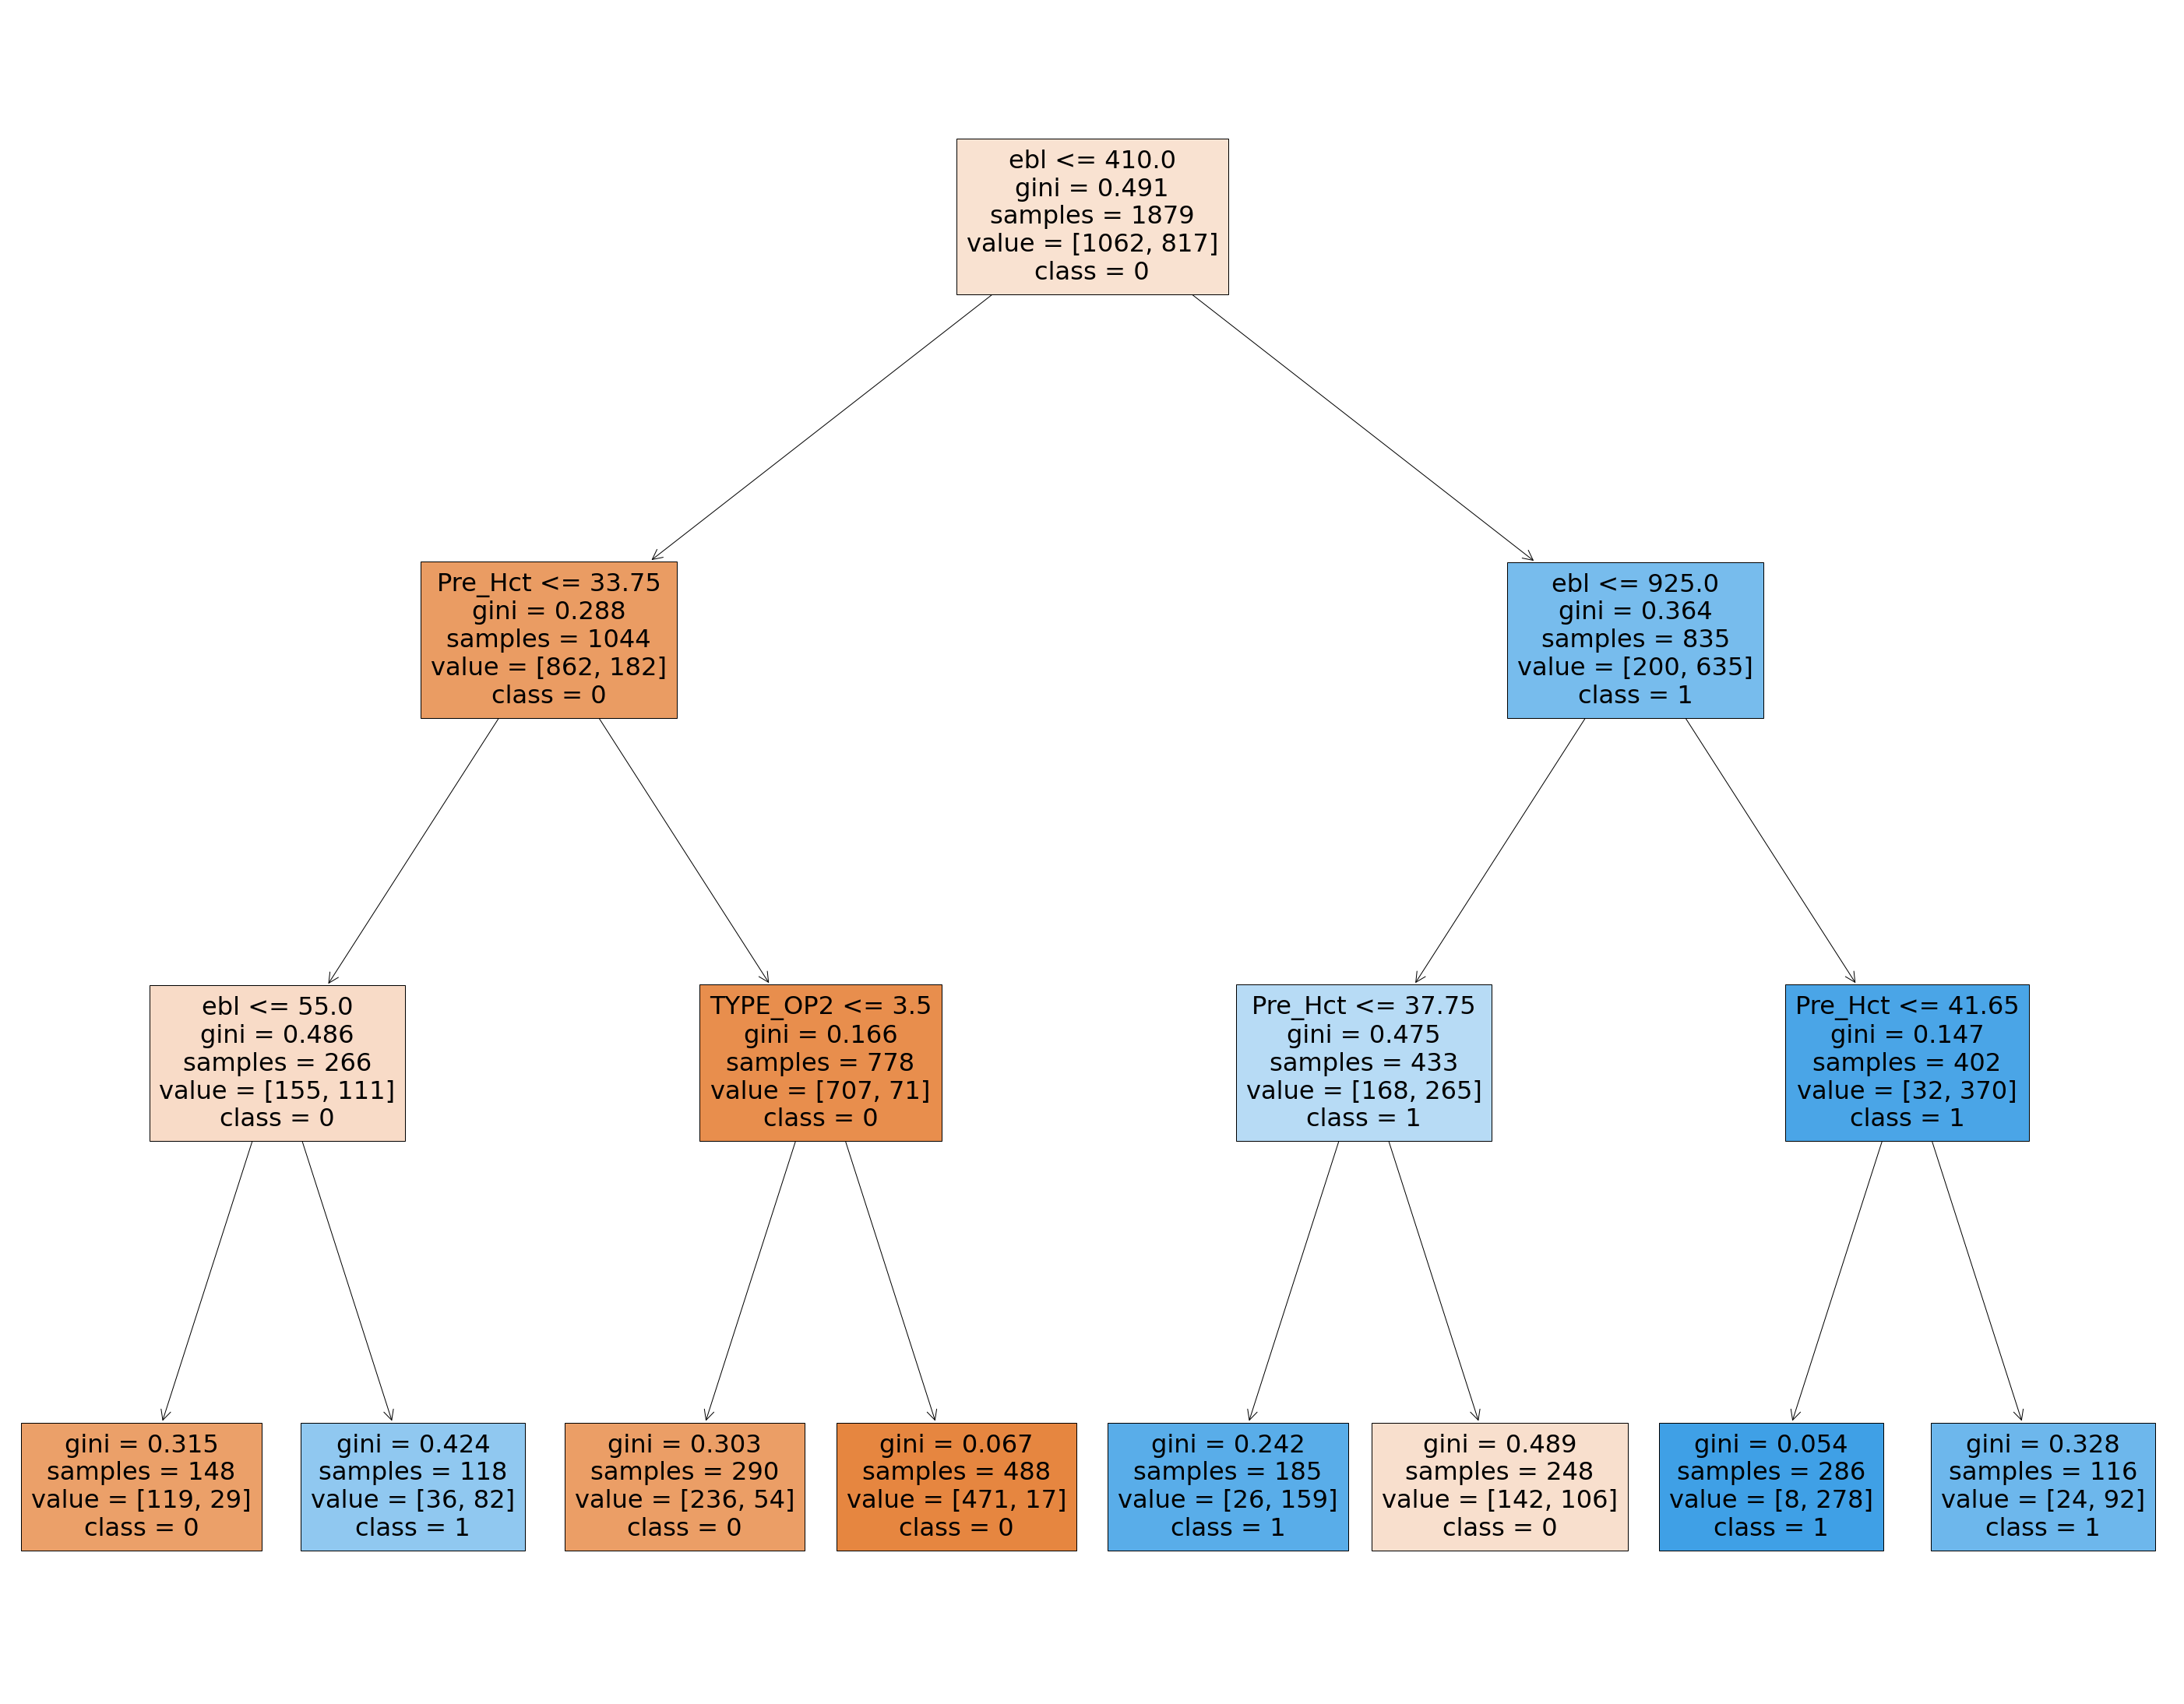

In [153]:
# ปรับขนาด
import matplotlib.pyplot as plt
plt.figure(figsize=(50,40))
fn=['DISE_gr2','TYPE_OP2','SSI','Emergency','ASA_Class','SEX','RF','WARFARIN','Age','ebl','Pre_Hb','Pre_Hct','Pre_PLT','NL_ratio','Pre_rPTT','Pre_PT_INR']
cn=['0', '1']
tree.plot_tree(dtGmodel ,feature_names=fn,class_names=cn,filled=True)
plt.show()


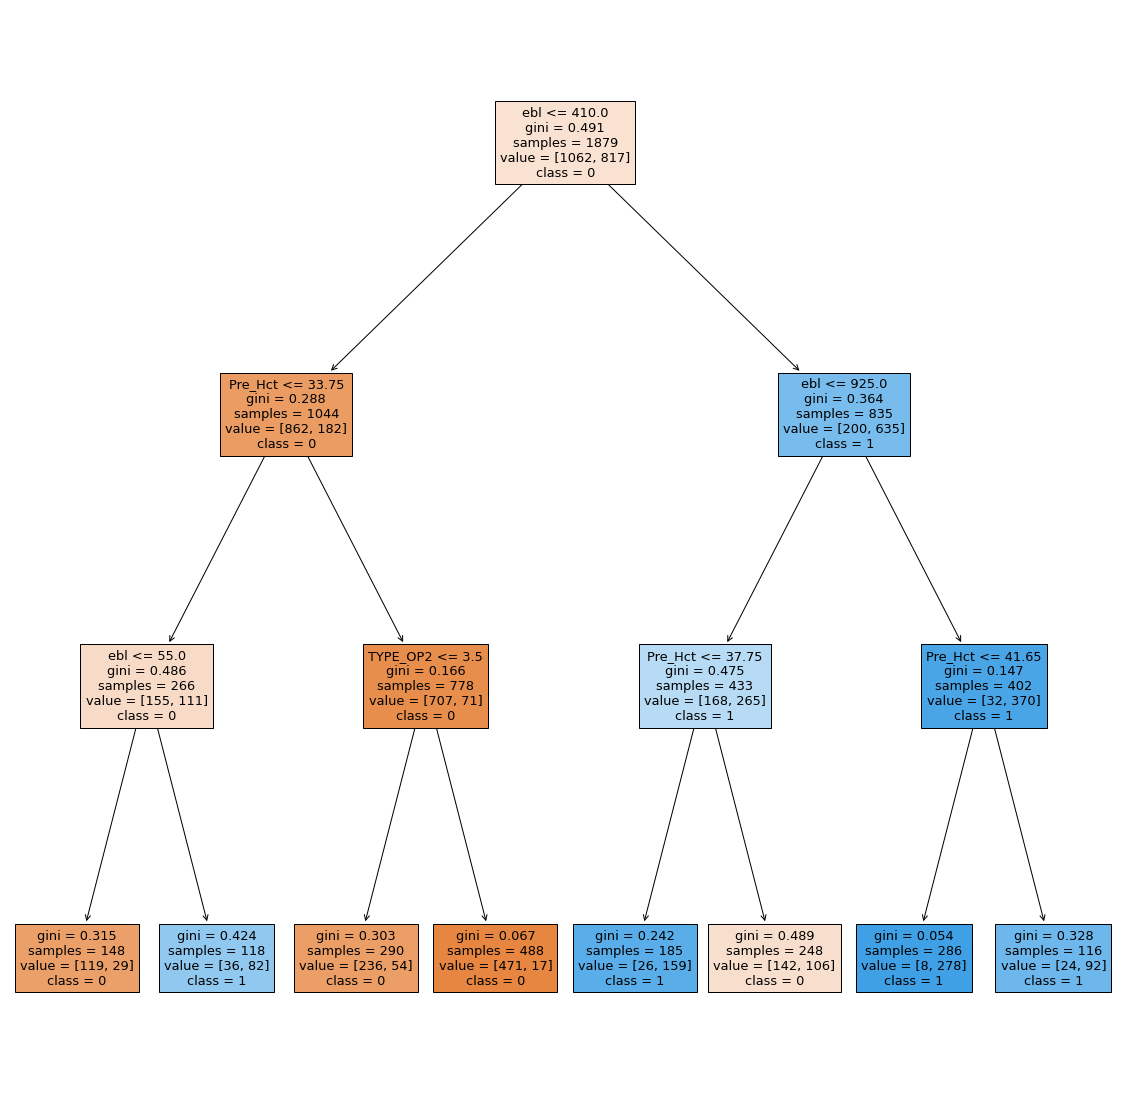

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
fn=['DISE_gr2','TYPE_OP2','SSI','Emergency','ASA_Class','SEX','RF','WARFARIN','Age','ebl','Pre_Hb','Pre_Hct','Pre_PLT','NL_ratio','Pre_rPTT','Pre_PT_INR']
cn=['0', '1']
tree.plot_tree(dtGmodel,feature_names=fn,class_names=cn,filled=True)
plt.show()

#pip install dtreeviz

#1.2Prediction post Grid # ตอนนี้ post Grid model = dtGmodel

In [155]:
# make predictions (GridSearch)
prediction_dt2= dtGmodel.predict(X_test)
probs_dt2=dtGmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_dt2 = probs_dt2[:, 1]

In [156]:
print(prediction_dt2)

[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 1 0 

In [157]:
print(probs_dt2)

[0.1862069  0.79310345 0.69491525 0.03483607 0.19594595 0.97202797
 0.85945946 0.97202797 0.97202797 0.42741935 0.1862069  0.69491525
 0.03483607 0.97202797 0.03483607 0.03483607 0.03483607 0.19594595
 0.97202797 0.1862069  0.97202797 0.42741935 0.03483607 0.79310345
 0.1862069  0.42741935 0.85945946 0.03483607 0.85945946 0.69491525
 0.03483607 0.97202797 0.79310345 0.19594595 0.1862069  0.03483607
 0.42741935 0.1862069  0.03483607 0.97202797 0.03483607 0.03483607
 0.85945946 0.97202797 0.1862069  0.97202797 0.03483607 0.03483607
 0.42741935 0.79310345 0.03483607 0.69491525 0.97202797 0.19594595
 0.97202797 0.42741935 0.85945946 0.1862069  0.42741935 0.69491525
 0.97202797 0.97202797 0.79310345 0.19594595 0.03483607 0.85945946
 0.42741935 0.85945946 0.19594595 0.1862069  0.03483607 0.03483607
 0.69491525 0.69491525 0.42741935 0.42741935 0.1862069  0.97202797
 0.1862069  0.1862069  0.03483607 0.97202797 0.42741935 0.19594595
 0.97202797 0.97202797 0.97202797 0.03483607 0.1862069  0.0348

## confusion matrix of post GridSearch

In [158]:
## confusion matrix of post GridSearch
#https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# confusion matrix
matrix = confusion_matrix(y_test,prediction_dt2, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_dt2,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_dt2,labels=[1,0])
print('Classification report : \n',matrix)
### ดู score ของ class 1

# Accuracy score from testing set 
acc=accuracy_score(y_test,dtGmodel.predict(X_test))
print("the accuracy score is %s"%acc)  


Confusion matrix : 
 [[238  95]
 [ 57 414]]
Outcome values : 
 238 95 57 414
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.71      0.76       333
           0       0.81      0.88      0.84       471

    accuracy                           0.81       804
   macro avg       0.81      0.80      0.80       804
weighted avg       0.81      0.81      0.81       804

the accuracy score is 0.8109452736318408


In [159]:
accuracy_score(y_test,dtGmodel.predict(X_test))

0.8109452736318408

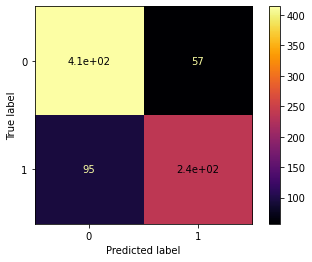

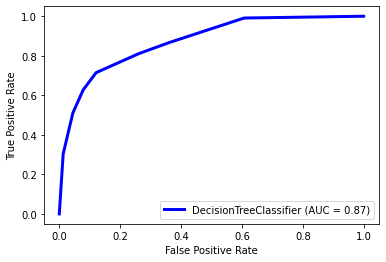

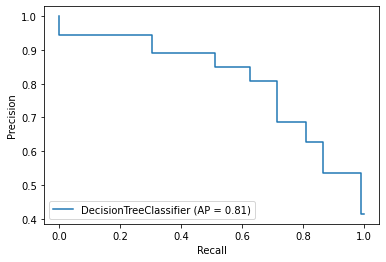

In [160]:
#confusion matrix2
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
plot_confusion_matrix(dtGmodel, X_test, y_test, display_labels=class_names,cmap=plt.cm.inferno)   # 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plot_roc_curve(dtGmodel, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(dtGmodel, X_test, y_test)

#3Post pruning techniques
Cost Complexity Pruning
** intial model =dt_clf นำมาใช้จากก่อนหน้า

In [161]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00034635 0.00034635 0.0003511  0.00046124 0.00046567
 0.00047306 0.00048785 0.00049126 0.00049126 0.00049126 0.00049859
 0.00050089 0.00050624 0.00050801 0.00050906 0.00051441 0.00051655
 0.00051741 0.00052491 0.00053061 0.0005322  0.0005322  0.0005322
 0.00053297 0.00058277 0.00061214 0.00064577 0.00066674 0.00067583
 0.00068177 0.00068842 0.00070166 0.0007096  0.0007096  0.0007096
 0.00073346 0.00074951 0.0007569  0.00078991 0.0007983  0.0007983
 0.00084361 0.00085152 0.00085152 0.00085931 0.00087335 0.00087393
 0.000887   0.000887   0.000887   0.000887   0.000887   0.000887
 0.00091234 0.00091234 0.00091234 0.00091501 0.00091875 0.00093135
 0.00094371 0.00094613 0.00094613 0.00095235 0.00095265 0.00097184
 0.0009757  0.00099344 0.00099344 0.00100401 0.00100921 0.0010279
 0.00103016 0.0010475  0.00108238 0.00109041 0.00110875 0.00113131
 0.00116499 0.00117527 0.00119745 0.00125067 0.00125739 0.00126593
 0.00136584 0.00139264 0.00141988 0.00142058 0.00145386 0.00147436
 

In [162]:
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas 
print(ccp_alphas)

[0.         0.00034635 0.0003511  0.00046124 0.00046567 0.00048785
 0.00049126 0.00049126 0.00049126 0.00050089 0.00050624 0.00050801
 0.00050906 0.00050906 0.00051441 0.00051655 0.00051741 0.00052491
 0.00053061 0.0005322  0.0005322  0.0005322  0.00053297 0.00058277
 0.00061214 0.00064577 0.00066674 0.00067583 0.00068177 0.00068842
 0.00070166 0.0007096  0.0007096  0.0007096  0.00073346 0.00074951
 0.00078991 0.0007983  0.0007983  0.00084361 0.00085152 0.00085152
 0.00085931 0.00087335 0.00087393 0.000887   0.000887   0.000887
 0.000887   0.000887   0.000887   0.00091234 0.00091234 0.00091234
 0.00091501 0.00091875 0.00093135 0.00094371 0.00094613 0.00094613
 0.00095235 0.00095265 0.00097184 0.0009757  0.00099344 0.00099344
 0.00100401 0.00100921 0.0010279  0.00103016 0.0010475  0.00108238
 0.00109041 0.00110875 0.00113131 0.00116499 0.00117527 0.00119745
 0.00125739 0.00126593 0.00136376 0.00136584 0.00139264 0.00141988
 0.00142058 0.00145386 0.00147436 0.00151479 0.0015671  0.001576

In [163]:
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.00034635 0.0003511  0.00046124 0.00046567 0.00048785
 0.00049126 0.00049126 0.00049126 0.00050089 0.00050624 0.00050801
 0.00050906 0.00050906 0.00051441 0.00051655 0.00051741 0.00052491
 0.00053061 0.0005322  0.0005322  0.0005322  0.00053297 0.00058277
 0.00061214 0.00064577 0.00066674 0.00067583 0.00068177 0.00068842
 0.00070166 0.0007096  0.0007096  0.0007096  0.00073346 0.00074951
 0.00078991 0.0007983  0.0007983  0.00084361 0.00085152 0.00085152
 0.00085931 0.00087335 0.00087393 0.000887   0.000887   0.000887
 0.000887   0.000887   0.000887   0.00091234 0.00091234 0.00091234
 0.00091501 0.00091875 0.00093135 0.00094371 0.00094613 0.00094613
 0.00095235 0.00095265 0.00097184 0.0009757  0.00099344 0.00099344
 0.00100401 0.00100921 0.0010279  0.00103016 0.0010475  0.00108238
 0.00109041 0.00110875 0.00113131 0.00116499 0.00117527 0.00119745
 0.00125739 0.00126593 0.00136376 0.00136584 0.00139264 0.00141988
 0.00142058 0.00145386 0.001

In [164]:
# For each alpha we will append our model to a list
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.16966031406423615


Last node in Decision tree is 1 and ccp_alpha for last node is 0.002421940671122738



In [165]:
print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16966031406423615 and a depth of: 0


In [178]:
#remove this tree (ccp_alpha: 1 with ccp_alpha: 0.06365245463527586 and a depth of: 0 ?) and continue
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

Number of nodes in the last tree is: 1 with ccp_alpha: 0.002421940671122738 and a depth of: 0



We plot how the different values of ccp_alpha influence the number of nodes and depth of the corresponding pruned trees.

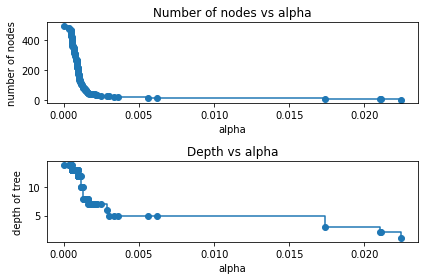

In [167]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Visualizing the accuracy score for train and test set.

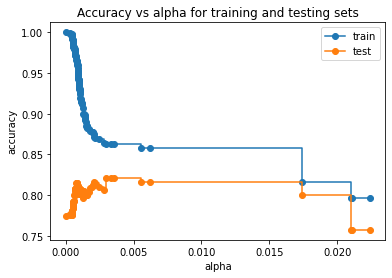

In [168]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

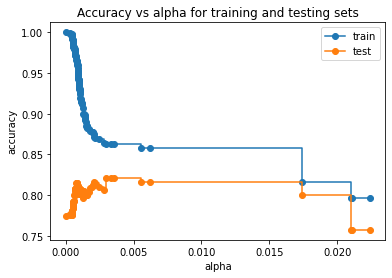

In [169]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


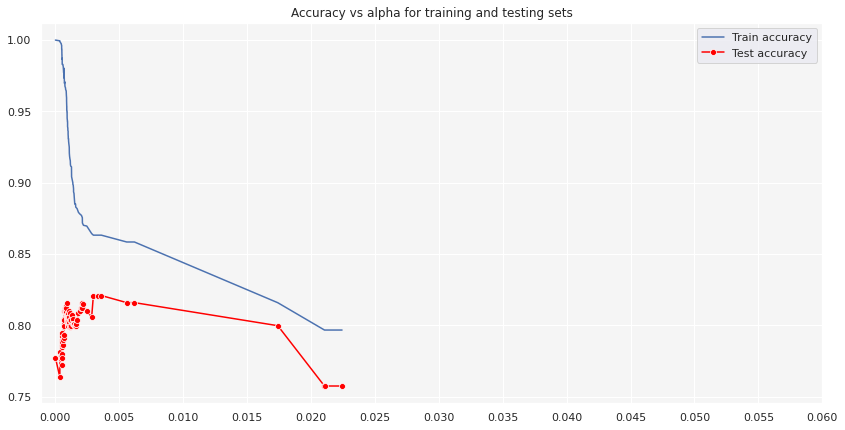

In [170]:
###code นี้สร้างbuiling model (tree) ตาม alpha ในตัวเลย และ plot acc vs alpha ในตัว
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracy_train,accuracy_test=[],[]

#Building a forest of trees with different values of ccp_alpha values 
for i in ccp_alphas:
      tree=DecisionTreeClassifier(ccp_alpha=i)

      tree.fit(X_train,y_train)
      y_train_pred=tree.predict(X_train)
      y_test_pred=tree.predict(X_test)

      accuracy_train.append(accuracy_score(y_train,y_train_pred))
      accuracy_test.append(accuracy_score(y_test,y_test_pred))

#Visualizing the accuracy score for training and testing sets
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=ccp_alphas, label="Train accuracy")
sns.lineplot(y=accuracy_test,x=ccp_alphas, label="Test accuracy", color='red',  marker='o')
 
# Setting the background color of the plot 
ax = plt.axes()
ax.set_facecolor("whitesmoke")
plt.xticks(ticks=np.arange(0.00,0.065,0.005))
plt.title('Accuracy vs alpha for training and testing sets')
plt.show()

In [171]:
#model ccp with best turning =>alpha 0.002421940671122738
clf_ccp4=DecisionTreeClassifier(random_state=0,ccp_alpha=0.002421940671122738)
clf_ccp4.fit(X_train,y_train) ## GINI critrerion

DecisionTreeClassifier(ccp_alpha=0.002421940671122738, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

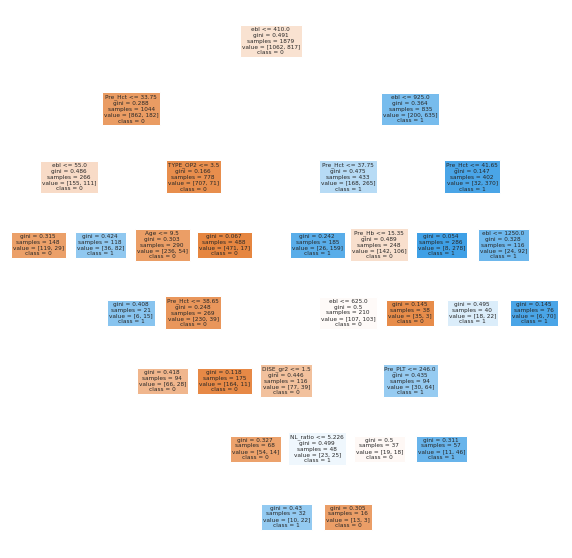

In [172]:
#plot dt of clf_ccp4
from sklearn import tree
plt.figure(figsize=(10,10))
fn=['DISE_gr2','TYPE_OP2','SSI','Emergency','ASA_Class','SEX','RF','WARFARIN','Age','ebl','Pre_Hb','Pre_Hct','Pre_PLT','NL_ratio','Pre_rPTT','Pre_PT_INR']
cn=['0', '1']
tree.plot_tree(clf_ccp4,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [173]:
#make prediction of ccp_clf4
prediction_dt3= clf_ccp4.predict(X_test)
probs_dt3=clf_ccp4.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_dt3 = probs_dt3[:, 1]

In [174]:
#confusion matrix of pruned model by ccp
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# confusion matrix
matrix = confusion_matrix(y_test,prediction_dt3, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_dt3,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_dt3,labels=[1,0])
print('Classification report : \n',matrix)

# Accuracy score from testing set 
acc=accuracy_score(y_test,clf_ccp4.predict(X_test))
print("the accuracy score is %s"%acc)  

Confusion matrix : 
 [[263  70]
 [ 79 392]]
Outcome values : 
 263 70 79 392
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.79      0.78       333
           0       0.85      0.83      0.84       471

    accuracy                           0.81       804
   macro avg       0.81      0.81      0.81       804
weighted avg       0.82      0.81      0.82       804

the accuracy score is 0.8146766169154229


In [175]:
accuracy_score(y_test,clf_ccp4.predict(X_test))

0.8146766169154229

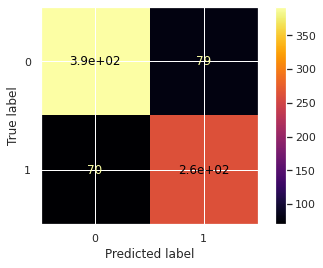

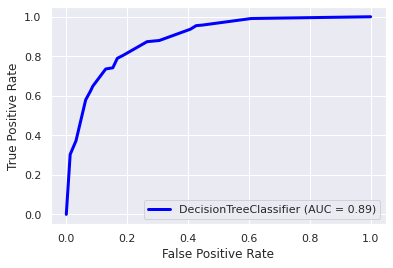

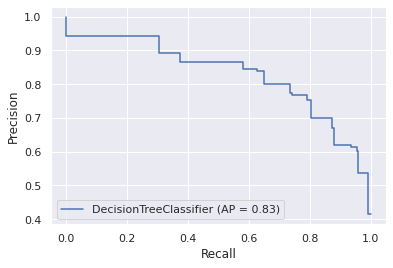

In [176]:
# plot confusion matrix, ROC and Precision-Recall of pruned model (clf_ccp4)
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
plot_confusion_matrix(clf_ccp4, X_test, y_test, display_labels=class_names,cmap=plt.cm.inferno)   # 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plot_roc_curve(clf_ccp4, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(clf_ccp4, X_test, y_test)


#SAVE DT_Gridsearch prediction


In [177]:
# Create df
my_data= prediction_dt2
# Create a Python list that holds the names of the two columns.
my_column_names = [ 'prediction_dt_Grid']
# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)
my_dataframe
#download csv file 
from google.colab import files
my_dataframe.to_csv('DT_Grid.csv') 
files.download('DT_Grid.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#SAVE DT postproine prediction

In [179]:
# Create df
my_data= prediction_dt3
# Create a Python list that holds the names of the two columns.
my_column_names = [ 'prediction_dt_postpruning']
# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)
my_dataframe
#download csv file 
from google.colab import files
my_dataframe.to_csv('DT_post.csv') 
files.download('DT_post.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#comparision of accuracy score

```
# มีการจัดรูปแบบเป็นโค้ด
```



# Random Forest

In [180]:
# fit initial model 
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [181]:
#crossval score ตอน training data Y train ว่า accuracy score เท่าไร แต่มันจะ overfit นะ 
from sklearn.model_selection import cross_val_score
#svc_clf = svm.SVC(kernel='rbf', C=1, random_state=42)
cross_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
cross_scores 

array([0.85904255, 0.85638298, 0.86968085, 0.85106383, 0.81866667])

Tuning parameter by GridsearchCV of RF

In [182]:
criterion = ['gini', 'entropy']
#max_depth =  (1,5)
#min_samples_split= (1,5)
#min_sample_left= (1,5)           

#param_grid= dict(criterion = criterion ,max_depth=max_depth, min_samples_split=min_samples_split, min_sample_left=min_sample_left )  
#param_grid= dict(criterion = criterion ,max_depth=max_depth, min_sample_left=min_sample_left  )  
#param_grid=dict(criterion = criterion , max_depth=max_depth ) 
param_grid=dict(criterion = criterion ) 

In [183]:
from sklearn.model_selection import GridSearchCV
rfGclf = GridSearchCV(estimator=rf_clf , param_grid=param_grid,cv=5)    #this is where we setup the grid search.

In [184]:
rfGclf.fit(X_train, y_train)        #this is the main code, where we fit the model to the training data for different grid points!

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [185]:
#รวมสูตร
criterion = ['gini', 'entropy']
param_grid=dict(criterion = criterion ) 
rfGclf = GridSearchCV(estimator=rf_clf , param_grid=param_grid,cv=5) 
rfGclf.fit(X_train, y_train)  


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [186]:
print("the best estimator is %s"%rfGclf.best_estimator_)  
print("the best params is %s"%rfGclf.best_params_)  
print("the best score is %s"%rfGclf.best_score_)  


the best estimator is RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
the best params is {'criterion': 'gini'}
the best score is 0.8456468085106383


Build postGrid mode = rfGmodel

In [187]:
rfGmodel=rfGclf.best_estimator_
#rfGmodel.fit(X_train, y_train) 

In [188]:
# make predictions
prediction_rf= rfGmodel.predict(X_test)
probs_rf=rfGmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_rf1 = probs_rf[:, 1]

In [189]:
print(prediction_rf)

[0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1
 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 1 0 

In [190]:
print(probs_rf)

[[0.83 0.17]
 [0.14 0.86]
 [0.5  0.5 ]
 ...
 [0.75 0.25]
 [0.97 0.03]
 [0.12 0.88]]


In [191]:
print(probs_rf1)

[0.17 0.86 0.5  0.07 0.5  0.92 0.91 0.87 0.73 0.36 0.35 0.59 0.   0.96
 0.17 0.01 0.02 0.11 0.84 0.18 0.91 0.46 0.02 0.45 0.22 0.86 0.89 0.04
 0.74 0.2  0.01 0.98 0.46 0.18 0.34 0.01 0.55 0.39 0.03 0.91 0.38 0.
 0.72 0.92 0.12 0.94 0.   0.09 0.32 0.52 0.07 0.69 0.93 0.22 0.95 0.11
 0.57 0.27 0.5  0.64 0.87 0.97 0.92 0.06 0.07 0.93 0.17 0.95 0.56 0.11
 0.02 0.02 0.46 0.52 0.83 0.7  0.11 0.9  0.07 0.1  0.04 0.74 0.42 0.18
 0.94 0.95 0.89 0.04 0.15 0.05 0.   0.01 0.77 0.95 0.05 0.62 0.   0.03
 0.43 0.96 0.73 0.96 0.88 0.19 0.44 0.58 0.06 0.38 0.77 0.01 0.89 0.72
 0.71 0.   0.86 0.9  0.96 0.82 0.51 0.43 0.06 0.05 0.1  0.49 0.28 0.36
 0.61 0.16 0.75 0.49 0.77 0.24 0.25 0.03 0.88 0.88 0.   0.08 0.78 0.13
 0.03 0.13 0.33 0.16 0.14 0.91 0.32 0.04 0.58 0.78 0.71 0.03 0.42 0.
 0.48 0.46 0.61 0.79 0.83 0.05 0.94 0.02 0.89 0.92 0.75 0.56 0.06 0.96
 0.77 0.29 0.04 0.16 0.01 0.94 0.   0.11 0.43 0.   0.   0.95 0.6  0.92
 0.86 0.08 0.22 0.81 0.28 0.77 0.25 0.09 0.51 0.   0.17 0.44 0.93 0.34
 0.88 0.81

Confusion matrix

In [192]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# confusion matrix
matrix = confusion_matrix(y_test,prediction_rf, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_rf,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_rf,labels=[1,0])
print('Classification report : \n',matrix)
### ดู score ของ class 1
# Accuracy score from testing set 
acc=accuracy_score(y_test,rfGmodel.predict(X_test))
print("the accuracy score is %s"%acc)  




Confusion matrix : 
 [[267  66]
 [ 66 405]]
Outcome values : 
 267 66 66 405
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.80      0.80       333
           0       0.86      0.86      0.86       471

    accuracy                           0.84       804
   macro avg       0.83      0.83      0.83       804
weighted avg       0.84      0.84      0.84       804

the accuracy score is 0.835820895522388


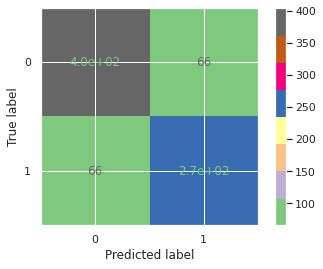

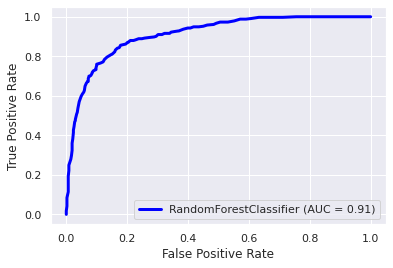

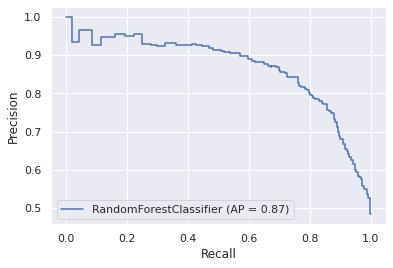

In [193]:
# plot confusion matrix, ROC curve, precision recall curve
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plot_confusion_matrix(rfGmodel, X_test, y_test, display_labels=class_names,cmap='Accent')    

plot_roc_curve(rfGmodel, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(rfGmodel, X_test, y_test)


#SAVE RF Prediction

In [194]:
# Create df
my_data= prediction_rf
# Create a Python list that holds the names of the two columns.
my_column_names = [ 'prediction_rf']
# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)
my_dataframe
#download csv file 
from google.colab import files
my_dataframe.to_csv('rf.csv') 
files.download('rf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#GradientBoostingClassifier

In [206]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
GBC_clf=GradientBoostingClassifier()
GBC_clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [207]:
#crossval score ตอน training data Y train ว่า accuracy score เท่าไร แต่มันจะ overfit นะ 
from sklearn.model_selection import cross_val_score
#svc_clf = svm.SVC(kernel='rbf', C=1, random_state=42)
cross_scores = cross_val_score(GBC_clf, X_train, y_train, cv=5)
cross_scores 

array([0.85904255, 0.86170213, 0.8856383 , 0.875     , 0.82666667])

Prediction no turning

In [208]:
# make predictions
prediction_GBC= GBC_clf.predict(X_test)
probs_GBC=GBC_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_GBC1 = probs_GBC[:, 1]

In [209]:
print(probs_GBC)

[[0.90425054 0.09574946]
 [0.06203451 0.93796549]
 [0.32974215 0.67025785]
 ...
 [0.87275912 0.12724088]
 [0.95089129 0.04910871]
 [0.13882171 0.86117829]]


In [253]:
print(probs_GBC1)

[0.09574946 0.93796549 0.67025785 0.07539155 0.39565139 0.967679
 0.84436113 0.88407457 0.82008813 0.22210569 0.13386465 0.61456747
 0.02470265 0.98904957 0.11796586 0.01630864 0.05429325 0.1011459
 0.90832399 0.14854532 0.95604638 0.45575452 0.03798231 0.28460851
 0.16308155 0.75849594 0.93173653 0.06117423 0.75198874 0.34409027
 0.02578856 0.97207162 0.37856223 0.13008599 0.2186908  0.01722963
 0.59128509 0.51355604 0.02351879 0.98779042 0.25744385 0.01993254
 0.85593938 0.98694167 0.09136552 0.97552764 0.01974292 0.09164887
 0.50528918 0.63212536 0.02057803 0.79818647 0.96189334 0.1843073
 0.98205718 0.08111935 0.84911914 0.1557202  0.46246127 0.60435614
 0.90252469 0.97178992 0.94672393 0.06249789 0.06426406 0.89876932
 0.11389987 0.92043323 0.33504798 0.02651783 0.02610839 0.01426845
 0.53731455 0.52359434 0.80559502 0.572285   0.11834561 0.96457783
 0.1165411  0.17397784 0.04775536 0.7747974  0.27279664 0.12044497
 0.97656319 0.96244891 0.97813213 0.04775536 0.1656321  0.02301587

In [212]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# confusion matrix
matrix = confusion_matrix(y_test,prediction_GBC, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_GBC,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_GBC,labels=[1,0])
print('Classification report : \n',matrix)
### ดู score ของ class 1
# Accuracy score from testing set 
acc=accuracy_score(y_test,GBC_clf.predict(X_test))
print("the accuracy score is %s"%acc)  



Confusion matrix : 
 [[266  67]
 [ 63 408]]
Outcome values : 
 266 67 63 408
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.80      0.80       333
           0       0.86      0.87      0.86       471

    accuracy                           0.84       804
   macro avg       0.83      0.83      0.83       804
weighted avg       0.84      0.84      0.84       804

the accuracy score is 0.8383084577114428


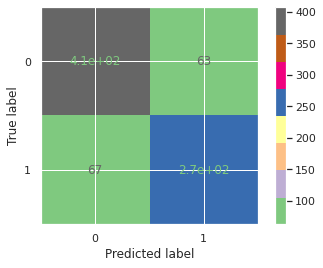

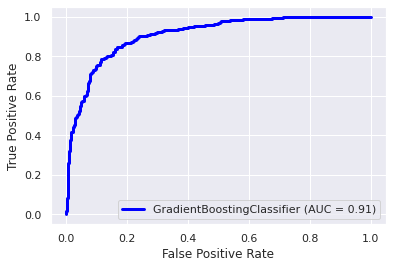

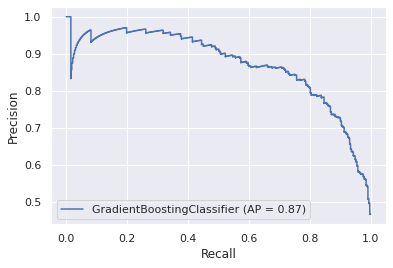

In [213]:
# plot confusion matrix, ROC curve, precision recall curve
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plot_confusion_matrix(GBC_clf, X_test, y_test, display_labels=class_names,cmap='Accent')    

plot_roc_curve(GBC_clf, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(GBC_clf, X_test, y_test)

In [214]:
# Create df
my_data= prediction_GBC
# Create a Python list that holds the names of the two columns.
my_column_names = [ 'prediction_GBC']
# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)
my_dataframe
#download csv file 
from google.colab import files
my_dataframe.to_csv('GBC.csv') 
files.download('GBC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Turing Gridsearch GBC  แล้ว ***Hang

In [203]:
criterion= ['friedman_mse', 'mse','mae']
loss= ['deviance', 'exponential']
n_estimators =  (100,500)

param_grid=dict(criterion=criterion,loss=loss,n_estimators=n_estimators  ) 

In [204]:
from sklearn.model_selection import GridSearchCV
GBCGclf = GridSearchCV(estimator=GBC_clf , param_grid=param_grid,cv=5)    #this is where we setup the grid search.
GBCGclf.fit(X_train, y_train)  

KeyboardInterrupt: ignored

In [201]:
print("the best estimator is %s"%GBCGclf.best_estimator_)  
print("the best params is %s"%GBCGclf.best_params_)  
print("the best score is %s"%GBCGclf.best_score_)  


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'gini'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'gini'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'gini'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'gini'

  FitFailedWarni

KeyError: ignored

# Logistic regression

In [215]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()
LR_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
#crossval score ตอน training data Y train ว่า accuracy score เท่าไร แต่มันจะ overfit นะ 
from sklearn.model_selection import cross_val_score
#svc_clf = svm.SVC(kernel='rbf', C=1, random_state=42)
cross_scores = cross_val_score(LR_clf, X_train, y_train, cv=5)
cross_scores 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.85638298, 0.85638298, 0.86170213, 0.81382979, 0.82666667])

In [217]:
#prediciotn no Grid
# make predictions
prediction_LR= LR_clf.predict(X_test)
probs_LR=LR_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_LR1 = probs_GBC[:, 1]

In [218]:
print(probs_LR)

[[0.93757881 0.06242119]
 [0.02702628 0.97297372]
 [0.63806899 0.36193101]
 ...
 [0.5944065  0.4055935 ]
 [0.95788967 0.04211033]
 [0.18416696 0.81583304]]


In [219]:
print(probs_LR1)

[0.09574946 0.93796549 0.67025785 0.07539155 0.39565139 0.967679
 0.84436113 0.88407457 0.82008813 0.22210569 0.13386465 0.61456747
 0.02470265 0.98904957 0.11796586 0.01630864 0.05429325 0.1011459
 0.90832399 0.14854532 0.95604638 0.45575452 0.03798231 0.28460851
 0.16308155 0.75849594 0.93173653 0.06117423 0.75198874 0.34409027
 0.02578856 0.97207162 0.37856223 0.13008599 0.2186908  0.01722963
 0.59128509 0.51355604 0.02351879 0.98779042 0.25744385 0.01993254
 0.85593938 0.98694167 0.09136552 0.97552764 0.01974292 0.09164887
 0.50528918 0.63212536 0.02057803 0.79818647 0.96189334 0.1843073
 0.98205718 0.08111935 0.84911914 0.1557202  0.46246127 0.60435614
 0.90252469 0.97178992 0.94672393 0.06249789 0.06426406 0.89876932
 0.11389987 0.92043323 0.33504798 0.02651783 0.02610839 0.01426845
 0.53731455 0.52359434 0.80559502 0.572285   0.11834561 0.96457783
 0.1165411  0.17397784 0.04775536 0.7747974  0.27279664 0.12044497
 0.97656319 0.96244891 0.97813213 0.04775536 0.1656321  0.02301587

In [220]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# confusion matrix
matrix = confusion_matrix(y_test,prediction_LR, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_LR,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_LR,labels=[1,0])
print('Classification report : \n',matrix)
### ดู score ของ class 1
# Accuracy score from testing set 
acc=accuracy_score(y_test,LR_clf.predict(X_test))
print("the accuracy score is %s"%acc)  



Confusion matrix : 
 [[249  84]
 [ 55 416]]
Outcome values : 
 249 84 55 416
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.75      0.78       333
           0       0.83      0.88      0.86       471

    accuracy                           0.83       804
   macro avg       0.83      0.82      0.82       804
weighted avg       0.83      0.83      0.83       804

the accuracy score is 0.8271144278606966


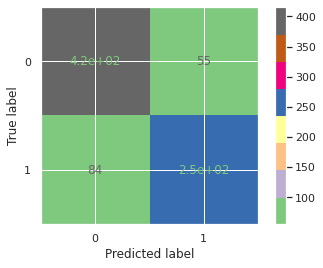

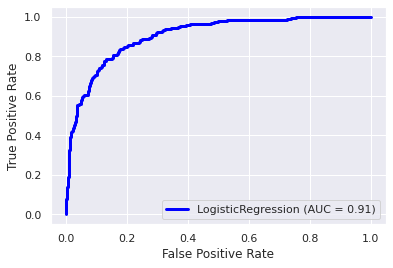

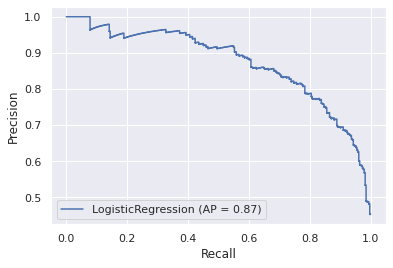

In [221]:
# plot confusion matrix, ROC curve, precision recall curve
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plot_confusion_matrix(LR_clf, X_test, y_test, display_labels=class_names,cmap='Accent')    

plot_roc_curve(LR_clf, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(LR_clf, X_test, y_test)

In [222]:
# Create df
my_data= prediction_LR
# Create a Python list that holds the names of the two columns.
my_column_names = [ 'prediction_LR']
# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)
my_dataframe
#download csv file 
from google.colab import files
my_dataframe.to_csv('LR.csv') 
files.download('LR.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#grid LR 

In [223]:
C =  (0.1,10)    
penalty = ['l1', 'l2','elasticnet','none']
max_iter =(20,100)
 
param_grid=dict(C=C ,penalty=penalty, max_iter =max_iter )  
LRGclf = GridSearchCV(estimator=LR_clf, param_grid=param_grid)    #this is where we setup the grid search.
LRGclf.fit(X_train, y_train)        #this is the main code, where we fit the model to the training data for different grid points!

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.1, 10), 'max_iter': (20, 100),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [225]:
print("the best estimator is %s"%LRGclf.best_estimator_)  
print("the best score is %s"%LRGclf.best_score_)  
print("the best params is %s"%LRGclf.best_params_)  
print("the best index is %s"%LRGclf.best_index_) 

the best estimator is LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
the best score is 0.8509815602836879
the best params is {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
the best index is 13


In [226]:
#built model by best parameter
LRGmodel=LRGclf.best_estimator_

In [229]:
#prediciotn  Grid
# make predictions
prediction_LRG= LRGmodel.predict(X_test)
probs_LRG=LRGmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_LRG1 = probs_GBC[:, 1]

In [230]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# confusion matrix
matrix = confusion_matrix(y_test,prediction_LRG, labels=[1,0])
print('Confusion matrix : \n',matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,prediction_LRG,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,prediction_LRG,labels=[1,0])
print('Classification report : \n',matrix)
### ดู score ของ class 1
# Accuracy score from testing set 
acc=accuracy_score(y_test,LRGmodel.predict(X_test))
print("the accuracy score is %s"%acc)  



Confusion matrix : 
 [[235  98]
 [ 46 425]]
Outcome values : 
 235 98 46 425
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.71      0.77       333
           0       0.81      0.90      0.86       471

    accuracy                           0.82       804
   macro avg       0.82      0.80      0.81       804
weighted avg       0.82      0.82      0.82       804

the accuracy score is 0.8208955223880597


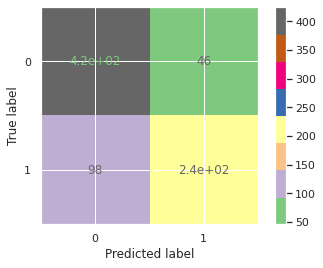

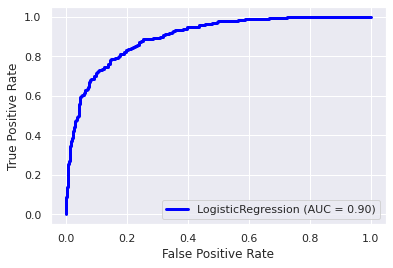

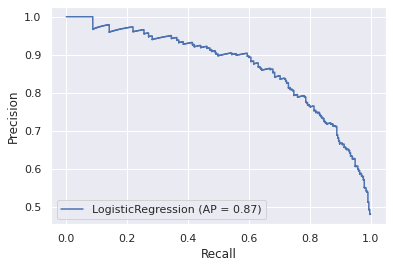

In [231]:
# plot confusion matrix, ROC curve, precision recall curve
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plot_confusion_matrix(LRGmodel, X_test, y_test, display_labels=class_names,cmap='Accent')    

plot_roc_curve(LRGmodel, X_test, y_test, color='blue', linewidth=3, linestyle='solid', marker='',
                           markerfacecolor='blue', markersize=12)

plot_precision_recall_curve(LRGmodel, X_test, y_test)

In [232]:
# Create df
my_data= prediction_LR
# Create a Python list that holds the names of the two columns.
my_column_names = [ 'prediction_LRG']
# Create a DataFrame.
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)
my_dataframe
#download csv file 
from google.colab import files
my_dataframe.to_csv('LRpostgrid.csv') 
files.download('LRpostgrid.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


#Multiplot ROC curves

In [235]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import  plot_roc_curve
from sklearn.metrics import  plot_precision_recall_curve
from sklearn.metrics import  roc_curve, auc, roc_auc_score

# generate a no skill prediction (majority class)
null_probs = [0 for _ in range(len(y_test))]

# predict probabilities and make prediction for svm
nb_probs = nb_clf.predict_proba(X_test)     # model=nb
prediction_svm= svc_clf .predict(X_test)  # model=svm (prediction)
ann_probs = annGclf.predict_proba(X_test) # model=ann
knn_probs = knnGclf.predict_proba(X_test) # model=knn
dt_probs = dtGmodel.predict_proba(X_test)   # model=pre-pruning dt
rf_probs = rfGmodel.predict_proba(X_test)   # model=rf
GBC_probs = GBC_clf.predict_proba(X_test)   # model=GBC
LR_probs = LRGmodel.predict_proba(X_test)   # model=LR

# keep probabilities for the positive outcome only
nb_probs1 = nb_probs[:, 1]
ann_probs1 = ann_probs[:, 1]
knn_probs1 = knn_probs[:, 1]
dt_probs1 = dt_probs[:, 1]
rf_probs1 = rf_probs[:, 1]
GBC_probs1 = GBC_probs[:, 1]
LR_probs1 = LR_probs[:, 1]

# calculate scores
null_auc = roc_auc_score(y_test, null_probs)
nb_auc1 = roc_auc_score(y_test, nb_probs1)
svm_auc2 = roc_auc_score(y_test, prediction_svm) # using prediction   
ann_auc3 = roc_auc_score(y_test,  ann_probs1)
knn_auc4 = roc_auc_score(y_test, knn_probs1)
dt_auc5 = roc_auc_score(y_test, dt_probs1)    
rf_auc6 = roc_auc_score(y_test, rf_probs1)
GBC_auc7 = roc_auc_score(y_test, GBC_probs1)
LR_auc8 = roc_auc_score(y_test, LR_probs1)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (null_auc))
print('nb: ROC AUC=%.3f' % (nb_auc1))
print('svm: ROC AUC=%.3f' % (svm_auc2))
print('ann: ROC AUC=%.3f' % (ann_auc3))
print('knn: ROC AUC=%.3f' % (knn_auc4))
print('dt: ROC AUC=%.3f' % (dt_auc5))
print('rf: ROC AUC=%.3f' % (rf_auc6))
print('GBC: ROC AUC=%.3f' % (GBC_auc7))
print('LR: ROC AUC=%.3f' % (LR_auc8))

# calculate roc curves
null_fpr, null_tpr, _ = roc_curve(y_test, null_probs)
nb_fpr1, nb_tpr1, _ = roc_curve(y_test, nb_probs1)
svm_fpr2, svm_tpr2, _ = roc_curve(y_test, prediction_svm)
ann_fpr3, ann_tpr3, _ = roc_curve(y_test,  ann_probs1)
knn_fpr4, knn_tpr4, _ = roc_curve(y_test, knn_probs1)
dt_fpr5, dt_tpr5, _ = roc_curve(y_test, dt_probs1)  
rf_fpr6, rf_tpr6, _ = roc_curve(y_test, rf_probs1)
GBC_fpr7, GBC_tpr7, _ = roc_curve(y_test, GBC_probs1)
LR_fpr8, LR_tpr8, _ = roc_curve(y_test, LR_probs1)

# AUC 
roc_auc1 = auc(nb_fpr1, nb_tpr1)
roc_auc2= auc(svm_fpr2, svm_tpr2)
roc_auc3 = auc(ann_fpr3, ann_tpr3)
roc_auc4 = auc(knn_fpr4, knn_tpr4)
roc_auc5 = auc(dt_fpr5, dt_tpr5)
roc_auc6 = auc(rf_fpr6, rf_tpr6)
roc_auc7 = auc(GBC_fpr7, GBC_tpr7)
roc_auc8 = auc(LR_fpr8, LR_tpr8)


No Skill: ROC AUC=0.500
nb: ROC AUC=0.826
svm: ROC AUC=0.762
ann: ROC AUC=0.912
knn: ROC AUC=0.820
dt: ROC AUC=0.873
rf: ROC AUC=0.909
GBC: ROC AUC=0.911
LR: ROC AUC=0.902


Combined ROC curves

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  """


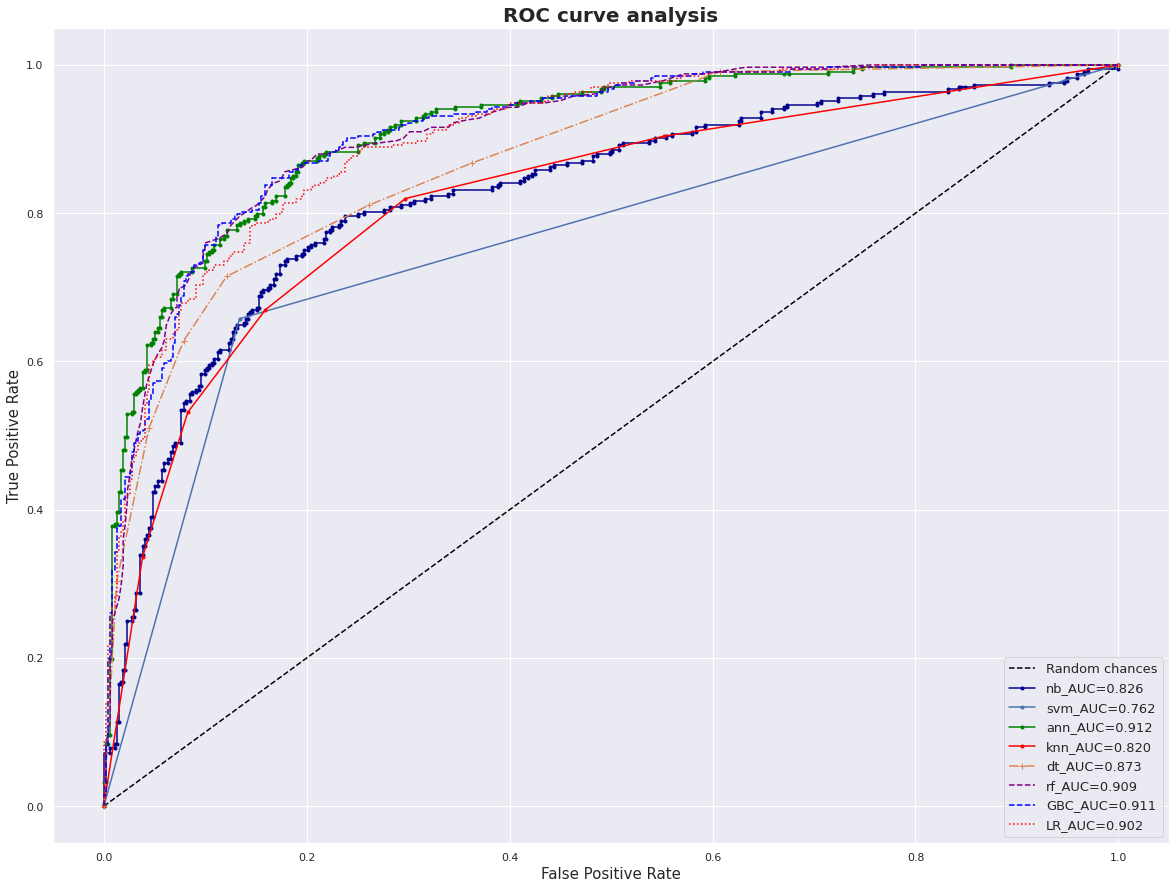

In [240]:
import matplotlib.pyplot as plt
# plot the roc curve for the model
fig = plt.figure(figsize=(20,15))
plt.plot(null_fpr, null_tpr, linestyle='--', label='Random chances',color='black')
plt.plot(nb_fpr1, nb_tpr1, linestyle='steps',marker='.', label='nb_AUC=0.826',color='darkblue')
plt.plot(svm_fpr2, svm_tpr2, marker='.', label='svm_AUC=0.762')
plt.plot(ann_fpr3, ann_tpr3, marker='.', label='ann_AUC=0.912', color='green')
plt.plot(knn_fpr4, knn_tpr4, marker='.', label='knn_AUC=0.820', color='red')
plt.plot(dt_fpr5, dt_tpr5, linestyle='-.',marker='+', label='dt_AUC=0.873')
plt.plot(rf_fpr6, rf_tpr6, linestyle='--', label='rf_AUC=0.909',color='purple') 
plt.plot(GBC_fpr7, GBC_tpr7, linestyle='dashed', label='GBC_AUC=0.911',color='blue') 
plt.plot(LR_fpr8, LR_tpr8, linestyle='dotted', label='LR_AUC=0.902',color='red') 


#plt.plot([0,1], [0,1], color='orange', linestyle='--')
# axis labels
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
# show the legend

plt.legend(prop={'size':13}, loc='lower right')
# show the title
plt.title('ROC curve analysis' ,fontweight='bold', fontsize=20)
# show the plot
plt.show()

# multiROC plot 
แต่ติดที่ pipeline นี้ใช้ กับ svm ไม่ได้เนื่องจาก svm ใช้ prediction คิด ROC ไม่ใช้ prob1

In [ ]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 

from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# classifer ตัวเอง

In [ ]:
classifiers = [GaussianNB(), 
               
    
           
           MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False),
           
        KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
        
        DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
               
          RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),


           
           ]                      

In [ ]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [ ]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [ ]:
#Plot the figure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

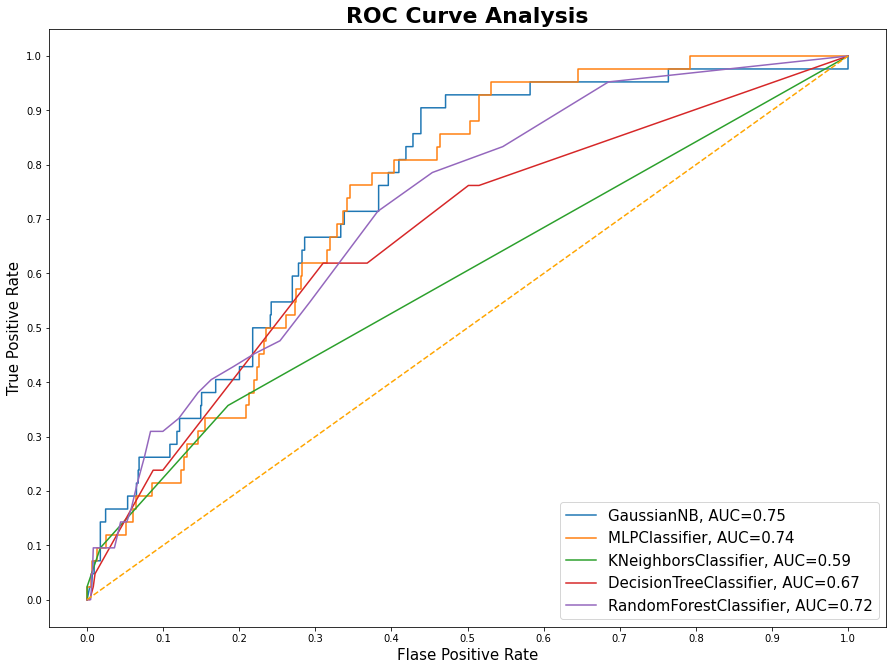

In [ ]:
fig = plt.figure(figsize=(15,11))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=22)
plt.legend(prop={'size':15}, loc='lower right')

plt.show()